In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df_total = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv')

### Colunas do dataset:
- **ID** - Identificador de entrada
- **Customer_ID** - ID cliente
- **Month** - Mês do ano
- **Name** - nome do cliente
- **Age** - Idade Cliente
- **SSN** - Social Security Number (CPF no Brasil)
- **Occupation** - Ocupação do cliente
- **Annual_Income** - renda anual
- **Monthly_Inhand_Salary** - Salario mensal do cliente
- **Num_Bank_Accounts** - quantidade de contas em bancos
- **Num_Credit_Card** - quantidade de cartões de crédito
- **Interest_Rate** - taxa de juros cartão de crédito
- **Num_of_Loan** - Quantidade de empréstimos feitos no banco
- **Type_of_Loan** - tipo de empréstimo feito pelo cliente
- **Delay_from_due_date** - qtd. de dias de atraso pagamento cartão
- **Num_of_Delayed_Payment** - Média de pagamentos atrasado pelo cliente
- **Changed_Credit_Limit** - Variação percentual de limite do cartão de crédito
- **Num_Credit_Inquiries** - Quantidade de "cobranças" no cartão
- **Credit_Mix** - mix de crédito do cliente
- **Outstanding_Debt** - restante à ser pago da dívida
- **Credit_Utilization_Ratio** - Taxa de utlização do cartão de crédito
- **Credit_History_Age** - Tempo de histórico de crédito do cliente
- **Payment_of_Min_Amount** - Pagamento minimo
- **Total_EMI_per_month** - Parcela mensal de amortização de empréstimo
- **Amount_invested_monthly** - Quantidade de dinheiro investido pelo cliente mensalmente
- **Payment_Behaviour** - Comportamento de pagamento cliente
- **Monthly_Balance** - Saldo Mensal Cliente
- **Credit_Score** - Target, Pontuação de uso de crédito


In [ ]:
# Avaliando as variaveis do dataset
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  object 
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  object 
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  object 
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

### 1. Avaliando a quantidade de dados faltantes nas colunas do dataset

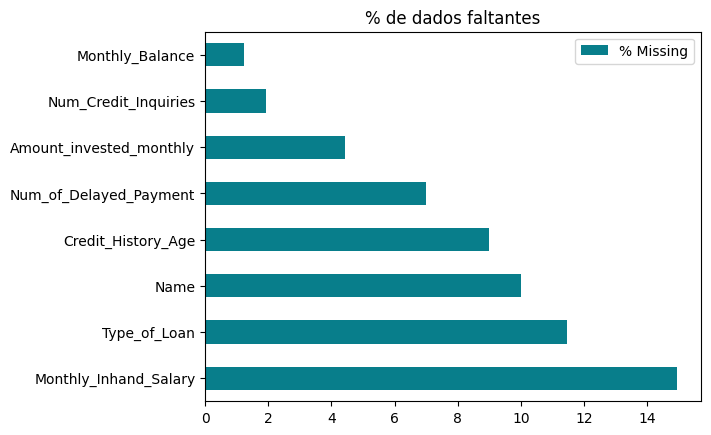

In [ ]:
# Esta função define a quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'% Missing' :na_df})
        missing_data.plot(kind = "barh", color='#087E8B')
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')

plot_nas(df_total)

In [ ]:
df_total.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42015309,High_spent_Medium_value_payments,341.489231,Good


### 2. Limpando os dados obtidos.

Manipulações realizadas:
1. Retirada de caracteres em variáveis númericas;
2. limpeza de dados inteiramente com "underline" e/ou caracteres incorretos.

In [ ]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_', '')

In [ ]:
# Removendo coluna ID, completamente inútil para a análise
df_total.drop(['ID'], axis = 1, inplace = True)

# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

# removendo os underlines e colocando NaN nas colunas Occupation, Changed_Credit_Limit, Credit_Mix
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

# removendo os erros de digitacao e colocando NaN nas colunas Payment_of_Min_Amount, Payment_Behaviour
df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

### 3. Convertendo a variável credit_history_age para uma variável númerica (qtd. em meses).

In [ ]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_Age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

### 4. Aplicando os data types corretos para cada tipo de feature.

In [ ]:
# Conversão dos dados

dicionario_conversao = {
    'Age': int,
    'Num_Bank_Accounts': int,
    'Num_Credit_Card': int,
    'Num_of_Loan': int,
    'Num_of_Delayed_Payment': int,
    'Annual_Income' : float,
    'Monthly_Inhand_Salary' : float,
    'Interest_Rate' : float,
    'Delay_from_due_date' : float,
    'Changed_Credit_Limit' : float,
    'Num_Credit_Inquiries' : float,
    'Outstanding_Debt' : float,
    'Credit_Utilization_Ratio' : float,
    'Changed_Credit_Limit' : float,
    'Amount_invested_monthly' : float,
    'Total_EMI_per_month' : float,
    'Num_of_Delayed_Payment' : float,
    'Monthly_Balance' : float,
    'Customer_ID' : object,
    'Name' : object,
    'Month' : object,
    'SSN' : object,
    'Type_of_Loan' : object,
    'Occupation' : object,
    'Credit_Mix' : object,
    'Payment_of_Min_Amount' : object,
    'Payment_Behaviour' : object
    }
# aplicando as type para variaveis

df_total = df_total.astype(dicionario_conversao)

In [ ]:
df_total_bkp = df_total.copy()

### 5. Avaliando a distribuição de todas as variáveis númericas.

É possível identificar uma grande quantidade de outliers nas distribuições.
Ao avaliarmos as features identificamos possíveis "regras de negócio" que poderiam ser atribuidas às variáveis.

Exemplo: Idade entre 18 e 100 anos, número de contas bancárias acima de 0 e menor que 20, etc.

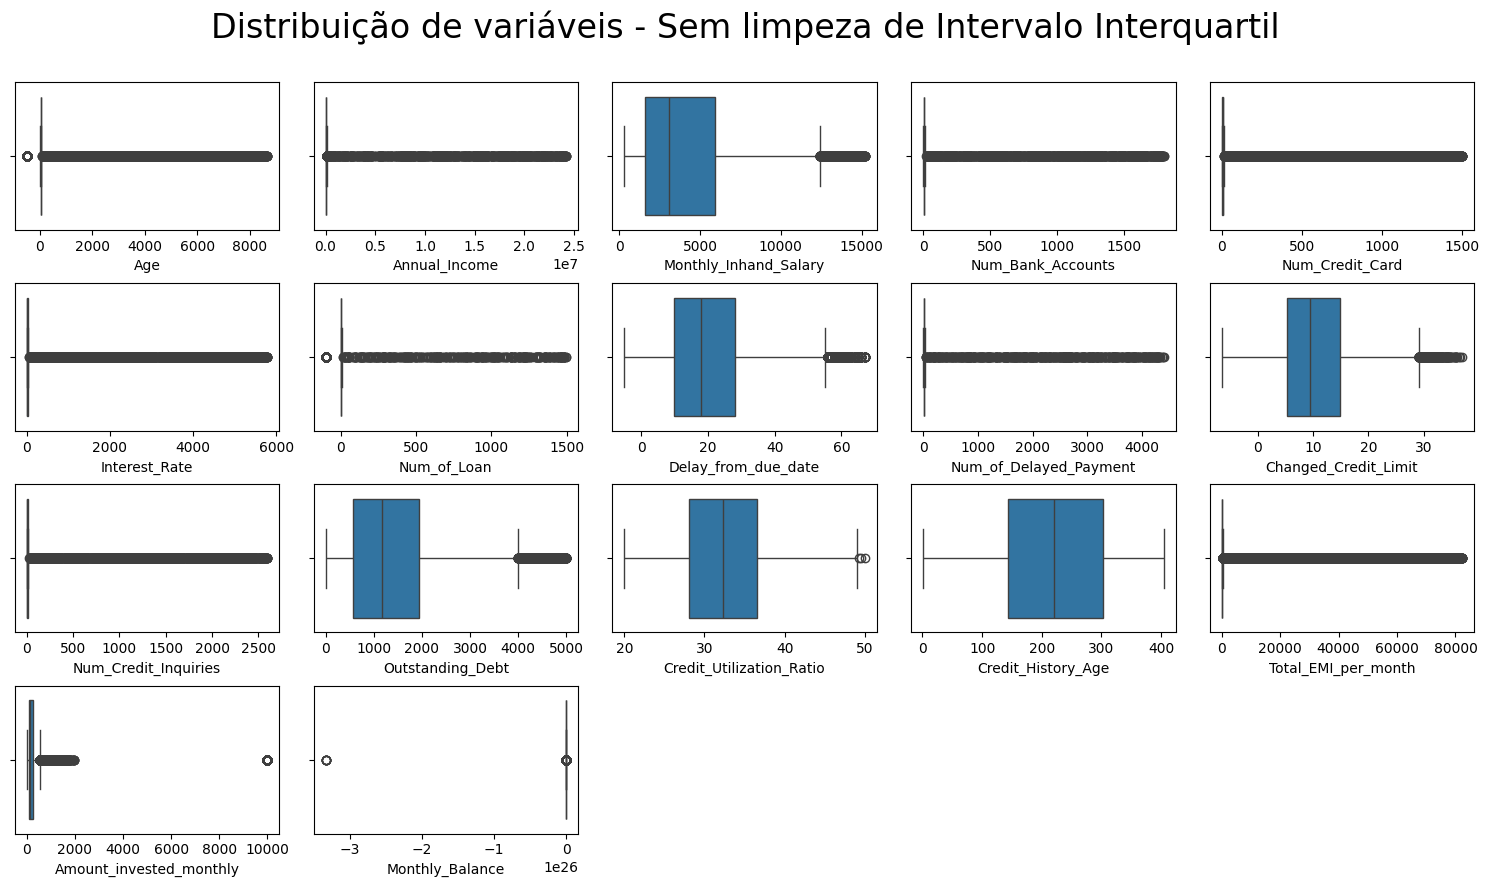

In [ ]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_total.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(x=df_total[col], ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Sem limpeza de Intervalo Interquartil\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()

In [ ]:
regras_de_negocio_moda = {
    'Age': (df_total['Age'] >= 18) & (df_total['Age'] <= 100),
    'Annual_Income': (df_total['Annual_Income'] >= 0) & (df_total['Annual_Income'] <= 1000000),
    'Num_Bank_Accounts': (df_total['Num_Bank_Accounts'] >= 0) & (df_total['Num_Bank_Accounts'] <= 20),
    'Num_Credit_Card': (df_total['Num_Credit_Card'] >= 0) & (df_total['Num_Credit_Card'] <= 20),
    'Interest_Rate': (df_total['Interest_Rate'] >= 0) & (df_total['Interest_Rate'] <= 100),
    'Num_of_Loan': (df_total['Num_of_Loan'] >= 0) & (df_total['Num_of_Loan'] <= 100),
    'Num_of_Delayed_Payment': (df_total['Num_of_Delayed_Payment'] >= 0) & (df_total['Num_of_Delayed_Payment'] <= 100),
    'Num_Credit_Inquiries': (df_total['Num_Credit_Inquiries'] >= 0) & (df_total['Num_Credit_Inquiries'] <= 100),
    'Total_EMI_per_month': (df_total['Total_EMI_per_month'] >= 0) & (df_total['Total_EMI_per_month'] <= 1000),
    # 'Amount_invested_monthly': (df_total['Amount_invested_monthly'] >= 0) & (df_total['Amount_invested_monthly'] <= 10000),
    # 'Monthly_Balance': (df_total['Monthly_Balance'] >= -10000) & (df_total['Monthly_Balance'] <= 100000)
}

regras_de_negocio_mediana = {
    'Monthly_Balance' : (df_total['Monthly_Balance'] <= -10000) & (df_total['Monthly_Balance'] <= 100000)
}

### 6. Criando funções para aplicarmos as regras de negócios.

As funções substituem o valor outlier/faltante para cada customer_ID utilizando a a moda/mediana das variáveis.

In [ ]:
def replace_out_of_range_with_mode(df, column, mask):
    """
    Substitui os valores em uma coluna especificada de um DataFrame onde a máscara é False
    pela moda dessa coluna para cada 'Customer_ID'.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    column (str): O nome da coluna onde a substituição pela moda será aplicada.
    mask (pd.Series): Máscara booleana que indica o intervalo válido. Os valores False serão substituídos pela moda.

    Retorna:
    pd.DataFrame: O DataFrame com a coluna especificada atualizada.
    """
    # Calculate the mode of the specified column for each 'Customer_ID'
    mode_col = df.groupby('Customer_ID')[column].transform(lambda x: x.mode()[0])

    # Replace values where mask is False with the mode
    df[column] = np.where(~mask, mode_col, df[column])

    return df

def apply_mode_replacement(df, columns_masks):
    """
    Aplica a função de substituição pela moda iterativamente a múltiplas colunas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    columns_masks (dict): Um dicionário onde as chaves são os nomes das colunas e os valores são as máscaras correspondentes.

    Retorna:
    pd.DataFrame: O DataFrame com todas as colunas especificadas atualizadas.
    """
    for column, mask in columns_masks.items():
        df = replace_out_of_range_with_mode(df, column, mask)
    return df

def replace_out_of_range_with_median(df, column, mask):
    """
    Substitui os valores em uma coluna especificada de um DataFrame onde a máscara é False
    pela moda dessa coluna para cada 'Customer_ID'.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    column (str): O nome da coluna onde a substituição pela moda será aplicada.
    mask (pd.Series): Máscara booleana que indica o intervalo válido. Os valores False serão substituídos pela moda.

    Retorna:
    pd.DataFrame: O DataFrame com a coluna especificada atualizada.
    """
    # Calculate the mode of the specified column for each 'Customer_ID'
    median_col = df.groupby('Customer_ID')[column].transform(lambda x: x.median()[0])

    # Replace values where mask is False with the mode
    df[column] = np.where(mask, median_col, df[column])

    return df

def apply_median_replacement(df, columns_masks):
    """
    Aplica a função de substituição pela moda iterativamente a múltiplas colunas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    columns_masks (dict): Um dicionário onde as chaves são os nomes das colunas e os valores são as máscaras correspondentes.

    Retorna:
    pd.DataFrame: O DataFrame com todas as colunas especificadas atualizadas.
    """
    for column, mask in columns_masks.items():
        df = replace_out_of_range_with_mode(df, column, mask)
    return df

In [ ]:
# aplicando funcoes
df_total = apply_mode_replacement(df_total, regras_de_negocio_moda)
df_total = apply_median_replacement(df_total, regras_de_negocio_mediana)

# existe um customer_id que em todos os registros o monthly_balance está com o valor ruim
# dropando esses registros
df_total.loc[df_total['Monthly_Balance'] < 0]['Customer_ID'].unique()
df_total.loc[df_total['Customer_ID'].isin(['CUS_0x9885', 'CUS_0x5a90', 'CUS_0x288d', 'CUS_0x85e9', 'CUS_0x2b77', 'CUS_0xc06e', 'CUS_0x57f3'])].head(3)
df_total = df_total[~df_total['Customer_ID'].isin(['CUS_0x9885', 'CUS_0x5a90', 'CUS_0x288d', 'CUS_0x85e9', 'CUS_0x2b77', 'CUS_0xc06e', 'CUS_0x57f3'])]

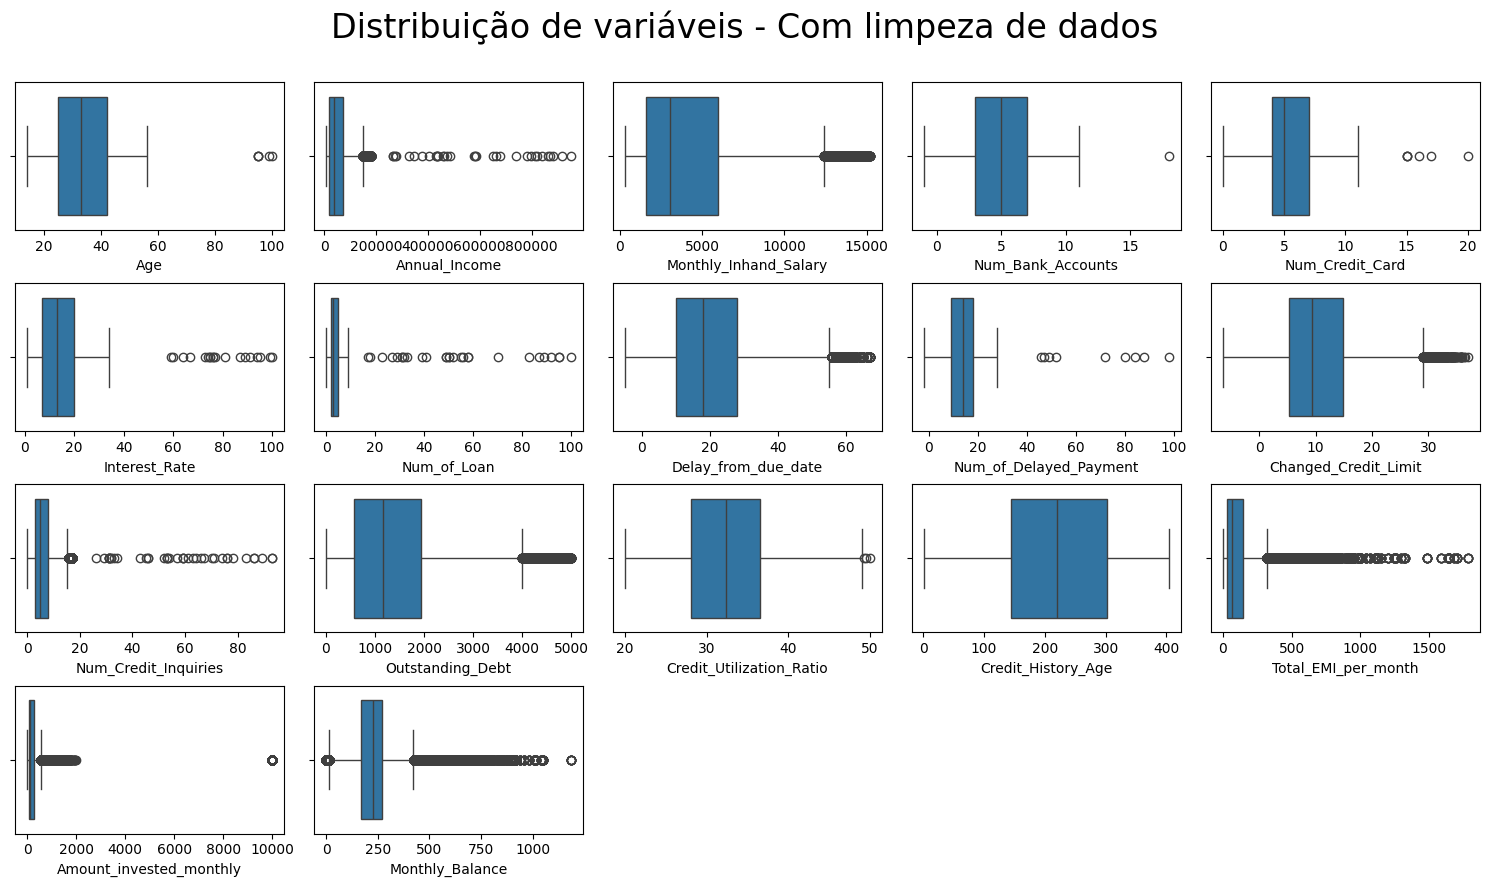

In [ ]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_total.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(x=df_total[col], ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Com limpeza de dados\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()

### 7. Avaliando a distribuição de credit score por faixa de idade

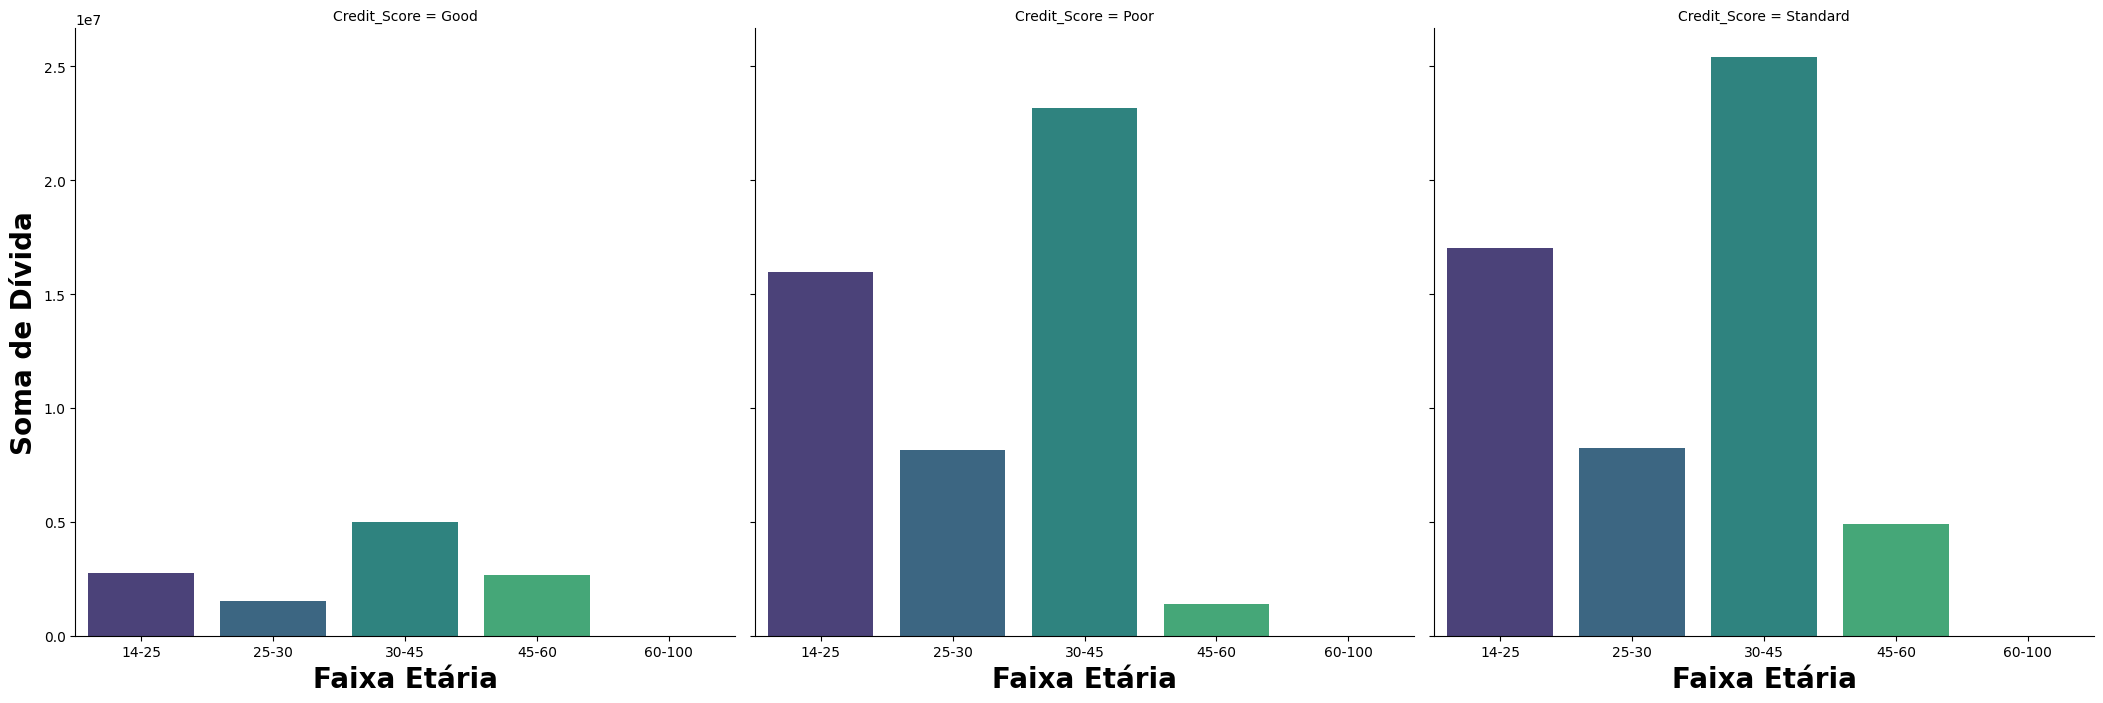

In [ ]:
df_agegroup = df_total.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[18, 25, 30, 45, 60, 100],
                             labels=["18-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", "Credit_Score"]).sum().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Outstanding_Debt",
                height=7,
                aspect=1,
                col="Credit_Score",
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Soma de Dívida", size=20, fontweight="bold")

plt.show()

### 8. Avaliando a distribuição de saldo devedor por agrupamentos de idade e score

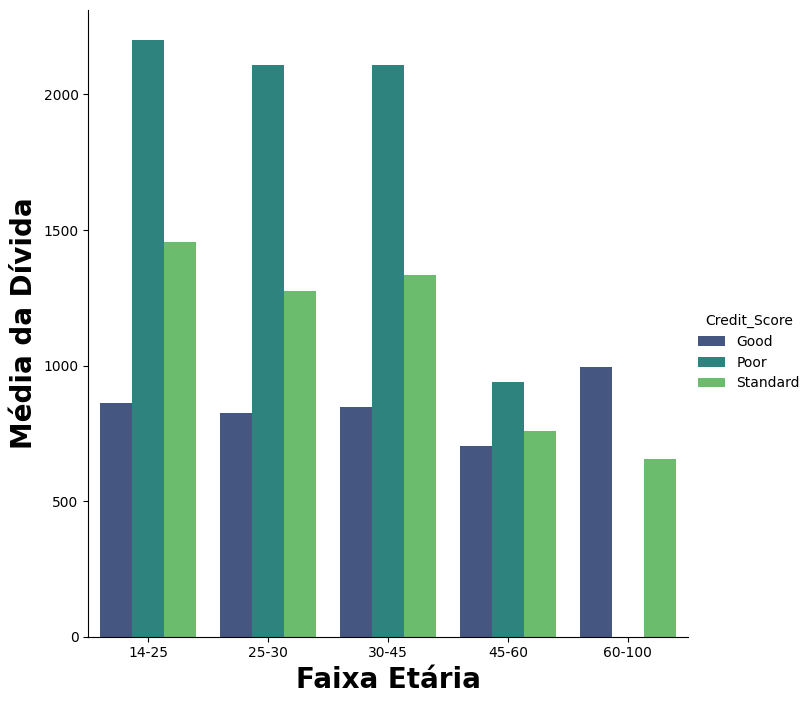

In [ ]:
df_agegroup = df_total.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[18, 25, 30, 45, 60, 100],
                             labels=["18-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", 'Credit_Score'])['Outstanding_Debt'].mean().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Outstanding_Debt",
                hue='Credit_Score',
                height=7,
                aspect=1,
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Média da Dívida", size=20, fontweight="bold")

plt.show()

### 9. Avaliando a taxa de utilização de crédito agrupada por idade e score de crédito.

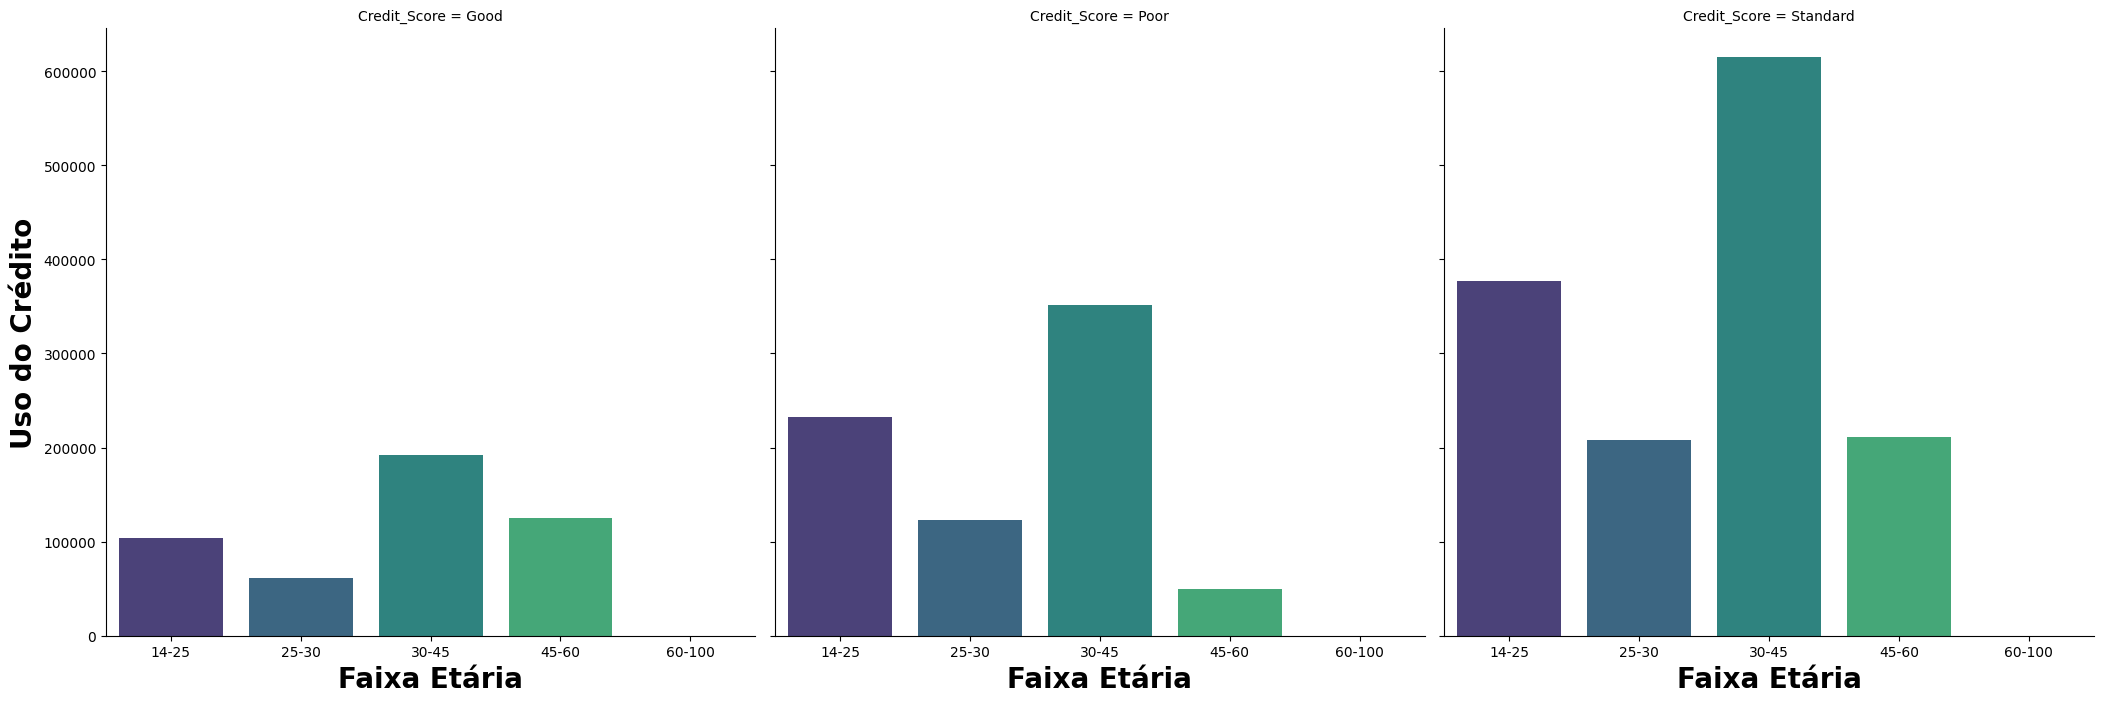

In [ ]:
df_agegroup = df_total.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[18, 25, 30, 45, 60, 100],
                             labels=["18-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", "Credit_Score"])["Credit_Utilization_Ratio"].sum().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Credit_Utilization_Ratio",
                height=7,
                aspect=1,
                col="Credit_Score",
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Uso do Crédito", size=20, fontweight="bold")

plt.show()

### 10. Analisando a média de atraso de pagamento por faixa de score

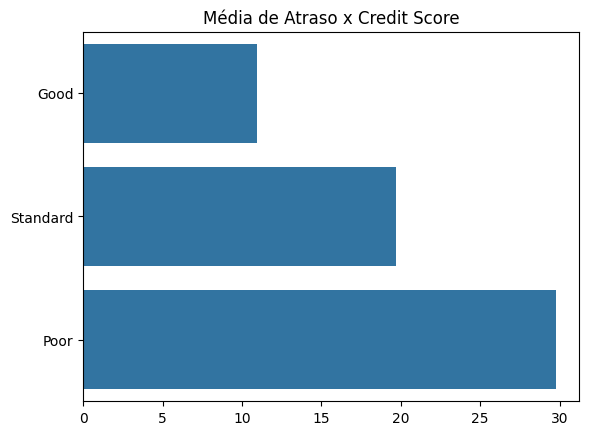

In [ ]:
ordem1 = df_total.groupby(['Credit_Score'])['Delay_from_due_date'].mean().sort_values().index

sns.barplot(data = df_total,
            x='Delay_from_due_date',
            y='Credit_Score',
            ci = None,
            order = ordem1)
plt.title('Média de Atraso x Credit Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

### 11. Analisando qual a média de quantidade de atrasos por faixa de score de crédito.

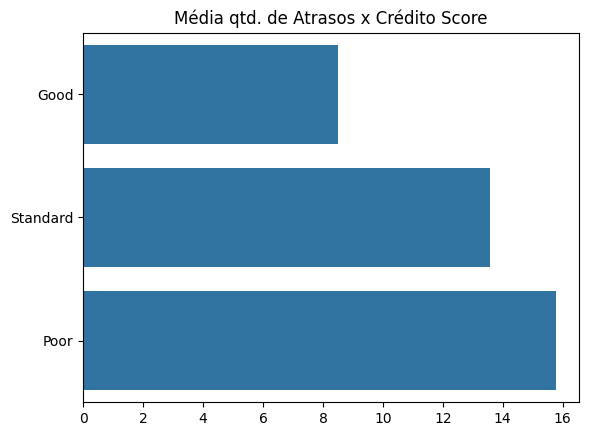

In [ ]:
ordem1 = df_total.groupby(['Credit_Score'])['Num_of_Delayed_Payment'].mean().sort_values().index

sns.barplot(data = df_total,
            x='Num_of_Delayed_Payment',
            y='Credit_Score',
            ci = None,
            order = ordem1)
plt.title('Média qtd. de Atrasos x Crédito Score')
plt.xlabel('')
plt.ylabel('')
plt.show()

### 12. Salário médio por faixa de score de crédito

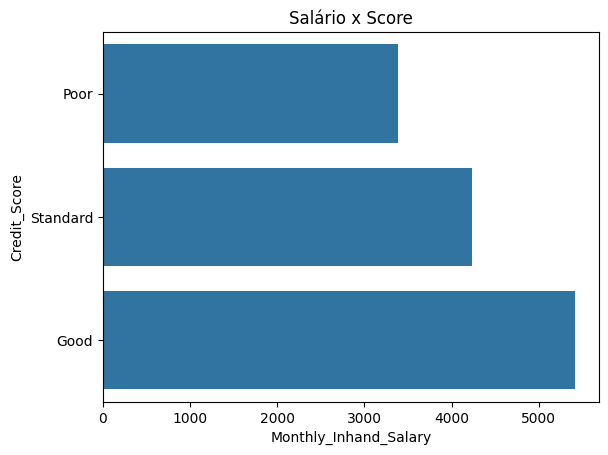

In [ ]:
ordem2 = df_total.groupby(['Credit_Score'])['Monthly_Inhand_Salary'].mean().sort_values().index

sns.barplot(data = df_total,
            x='Monthly_Inhand_Salary',
            y='Credit_Score',
            ci = None,
            order = ordem2)

plt.title('Salário x Score')
plt.show()

### 13. Distribuição de salários x Faixa de Score.

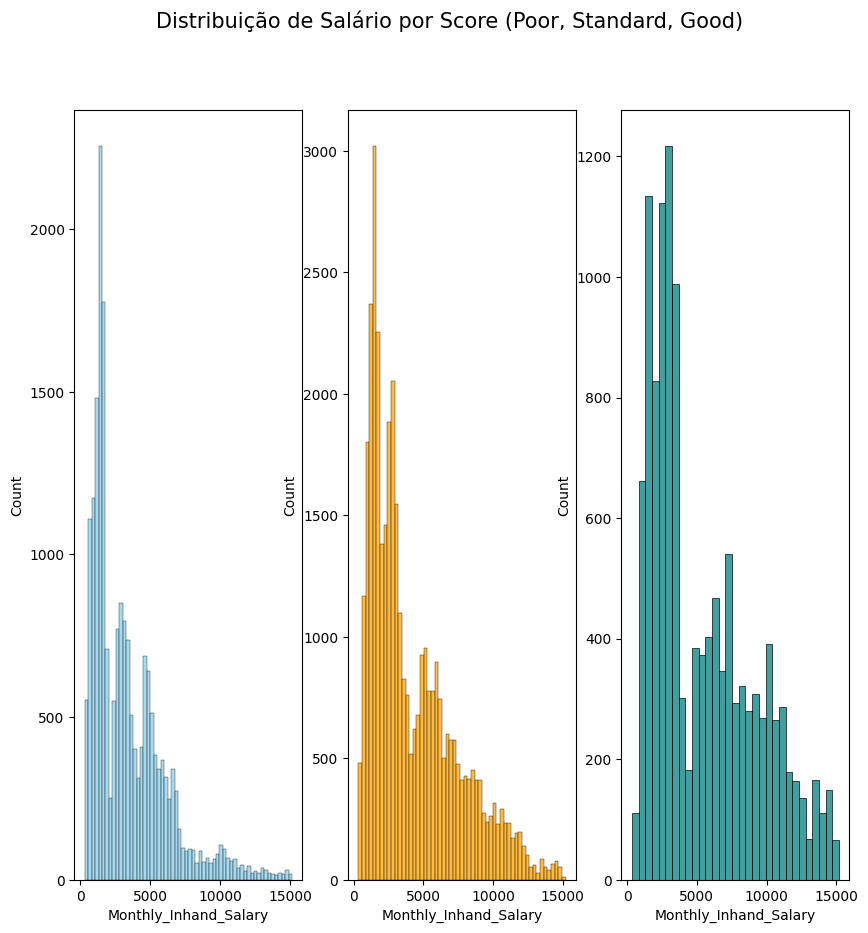

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (10,10))

sns.histplot(data = df_total[df_total['Credit_Score'] == 'Poor'], x = 'Monthly_Inhand_Salary', ax = axs[0], color = 'skyblue')
sns.histplot(data = df_total[df_total['Credit_Score'] == 'Standard'], x = 'Monthly_Inhand_Salary', ax = axs[1], color = 'orange')
sns.histplot(data = df_total[df_total['Credit_Score'] == 'Good'], x = 'Monthly_Inhand_Salary', ax = axs[2], color = 'teal')

fig.suptitle('Distribuição de Salário por Score (Poor, Standard, Good)', size = 15)
plt.show()

### 14. Avaliando quais as profissões com maior atraso

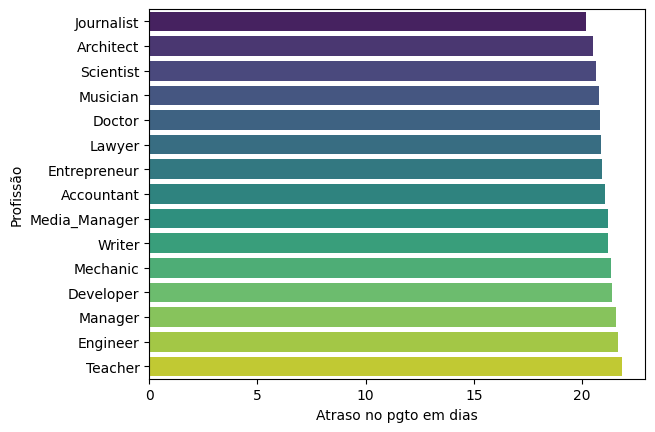

In [ ]:
ordem1 = df_total.groupby(['Occupation'])['Delay_from_due_date'].mean().sort_values().index

sns.barplot(data = df_total,
            x='Delay_from_due_date',
            y='Occupation',
            ci = None,
            order = ordem1,
            palette='viridis')
plt.xlabel('Atraso no pgto em dias')
plt.ylabel('Profissão')
plt.show()

### 15. Concentração de faixas de score por profissão.

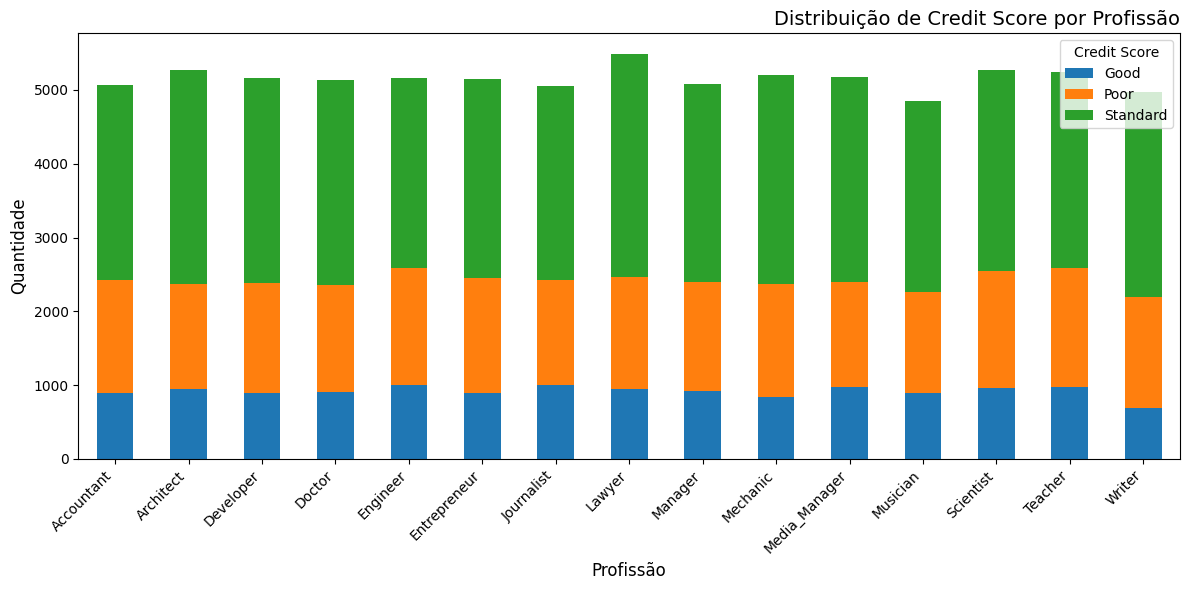

In [ ]:
df_plot = df_total.groupby(['Occupation', 'Credit_Score']).size().reset_index().pivot(columns='Credit_Score', index='Occupation', values=0)
ax = df_plot.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increase figure size
plt.xlabel('Profissão', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Quantidade', fontsize=12)  # Increase y-axis label font size
plt.title('Distribuição de Credit Score por Profissão', fontsize=14, loc='right')  # Add title and position it to the top right
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.legend(title='Credit Score', fontsize=10)  # Increase legend font size
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

### 16. Profissões com maior saldo devedor.

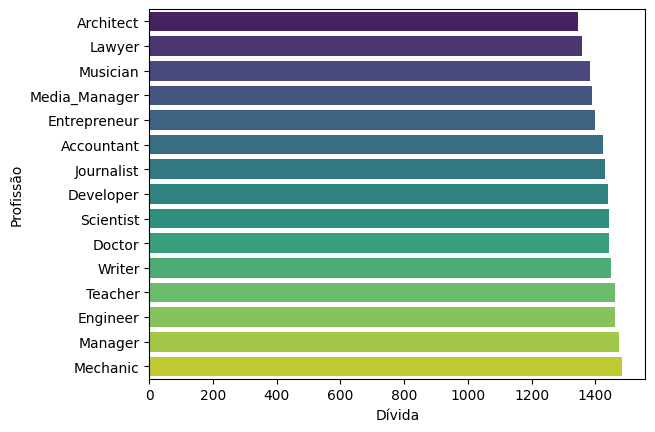

In [ ]:
ordem1 = df_total.groupby(['Occupation'])['Outstanding_Debt'].mean().sort_values().index

sns.barplot(data = df_total,
            x='Outstanding_Debt',
            y='Occupation',
            ci = None,
            order = ordem1,
            palette='viridis')
plt.xlabel('Dívida')
plt.ylabel('Profissão')
plt.show()

### 17. Proporção de scores

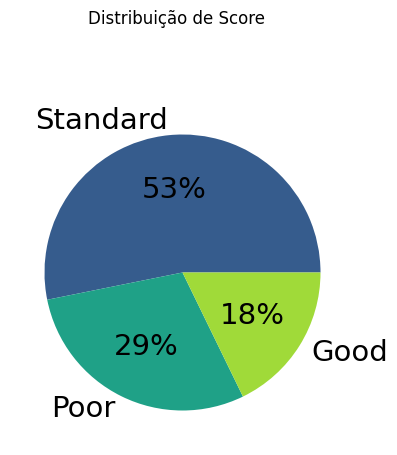

In [ ]:
plt.figure(figsize=(5,5))

plt.pie(df_total.Credit_Score.value_counts(normalize=True),
        labels=['Standard', 'Poor', 'Good'],
        textprops={'fontsize': 21},
        colors = sns.color_palette('viridis')[1:6:2],
        autopct='%.0f%%'
        )

plt.suptitle("Distribuição de Score")
plt.subplots_adjust(top=0.80)
plt.show();

### 18. Distribuição de idade por perfil de pagamento

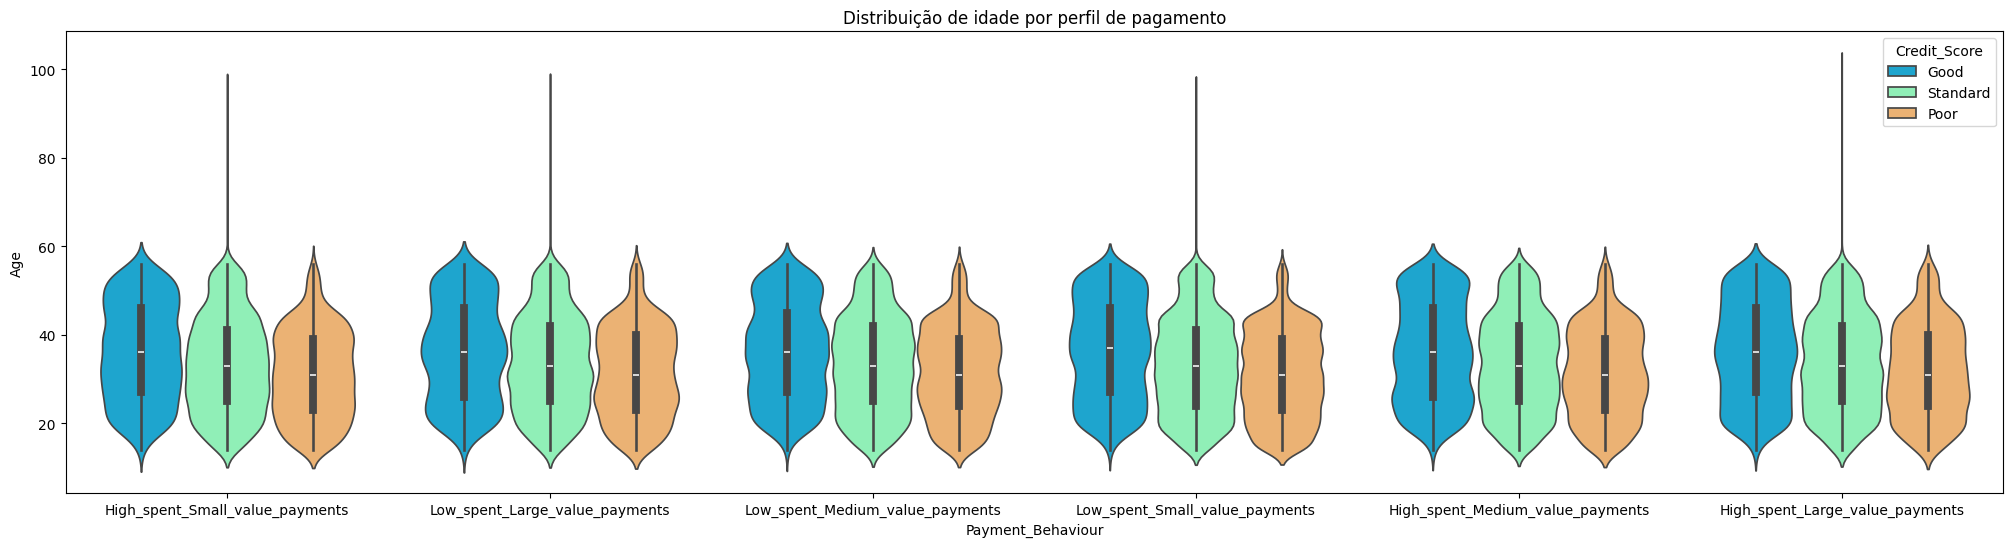

In [ ]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Age',data=df_total, hue='Credit_Score', palette='rainbow')
plt.title("Distribuição de idade por perfil de pagamento")
plt.show()

### 19. Distribuição de idade por perfil de pagamento

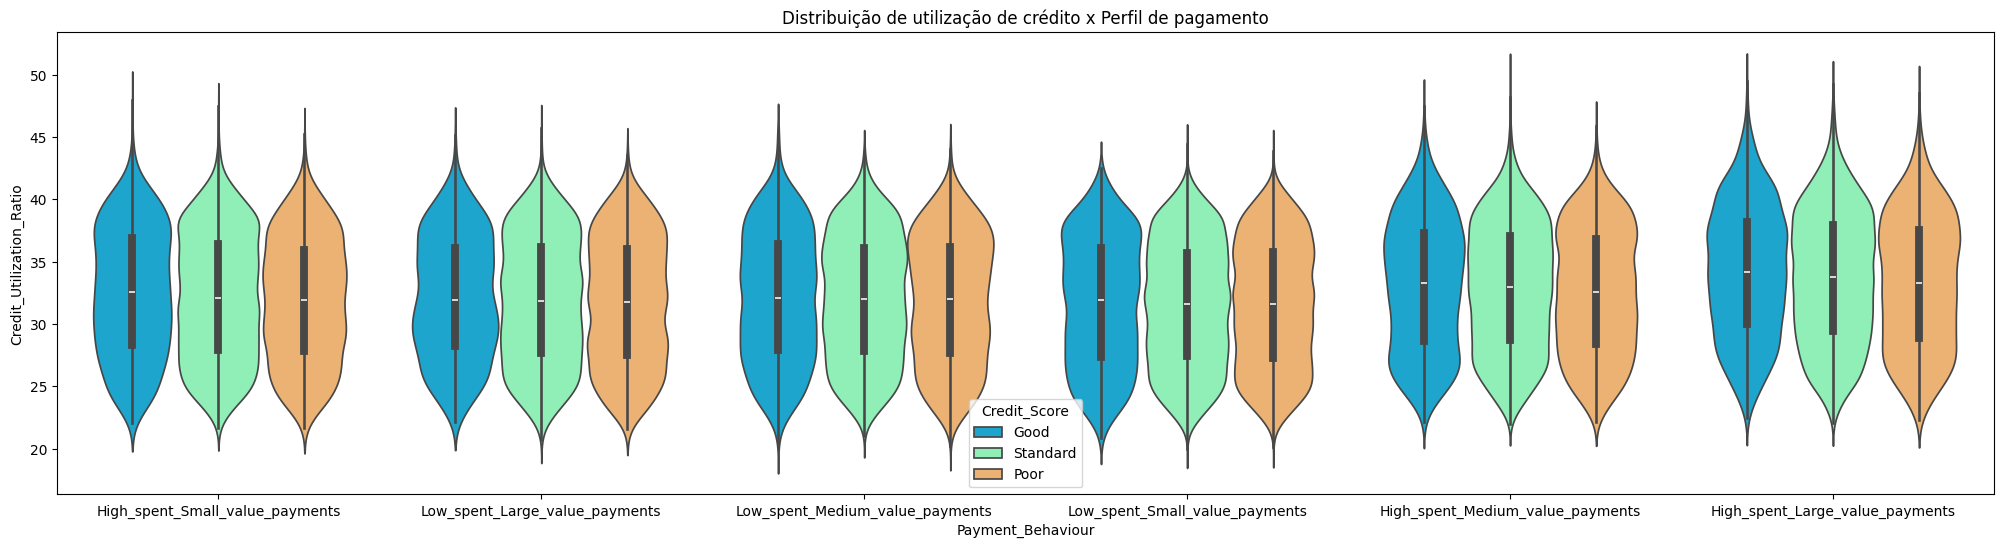

In [ ]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Credit_Utilization_Ratio',data=df_total, hue='Credit_Score', palette='rainbow')
plt.title("Distribuição de utilização de crédito x Perfil de pagamento")
plt.show()

### 20. Distribuição acumulada da utilização de crédito x faixas de score de crédito

<Figure size 5900x100 with 0 Axes>

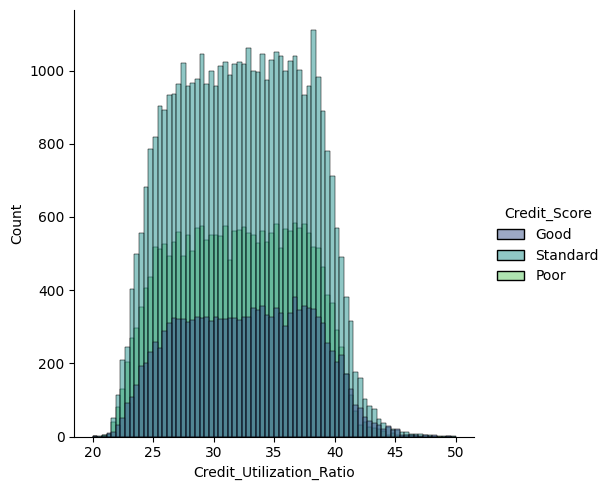

In [ ]:
plt.figure(figsize=(59,1))
sns.displot(data=df_total, x="Credit_Utilization_Ratio", palette='viridis', hue='Credit_Score')

### 21. Distribuição de salário mensal x Credit Score

<Figure size 5900x100 with 0 Axes>

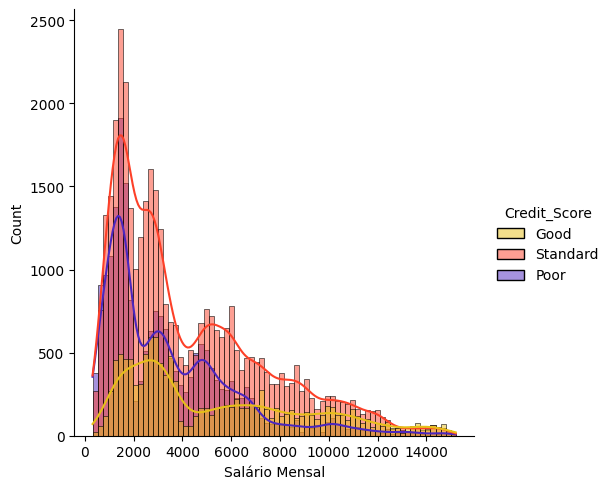

In [ ]:
plt.figure(figsize=(59,1))
sns.displot(data=df_total, x="Monthly_Inhand_Salary", kde=True, palette='CMRmap_r', hue='Credit_Score');
plt.xlabel('Salário Mensal');

<Figure size 5900x100 with 0 Axes>

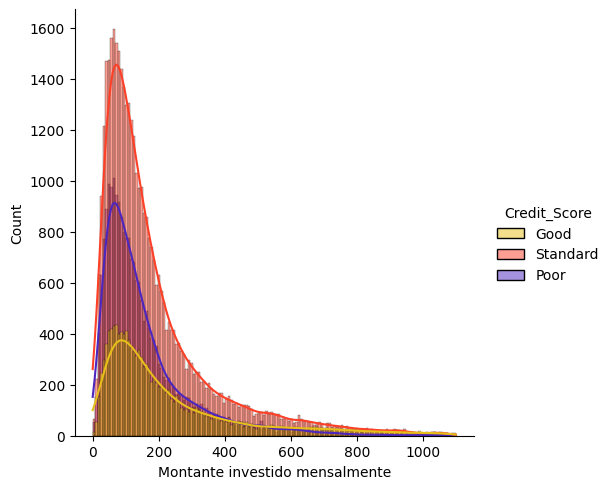

In [ ]:
plt.figure(figsize=(59,1))
sns.displot(data=df_total[df_total['Amount_invested_monthly']<1100], x="Amount_invested_monthly", kde=True, palette='CMRmap_r', hue='Credit_Score');
plt.xlabel('Montante investido mensalmente');

### 22. Análise sobre o montante investido por idade e faixas de score.

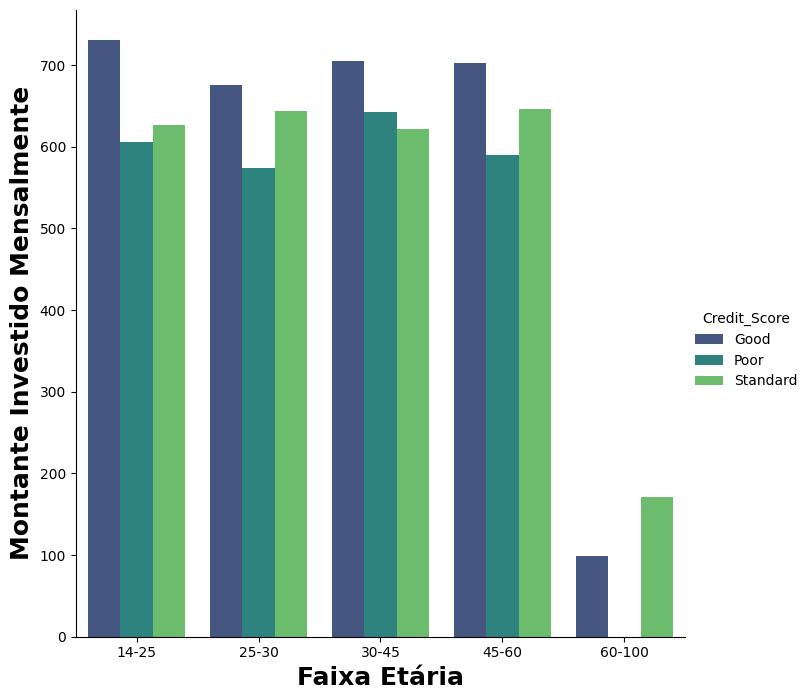

In [ ]:
df_agegroup = df_total.copy()

df_agegroup["Age_Group"] = pd.cut(df_agegroup.Age,
                             bins=[14, 25, 30, 45, 60, 100],
                             labels=["14-25", "25-30", "30-45", "45-60", "60-100"],
                            )

age_groups = (df_agegroup.groupby(["Age_Group", 'Credit_Score'])['Amount_invested_monthly'].mean().reset_index())

sns.catplot(data=age_groups,
                x="Age_Group",
                y="Amount_invested_monthly",
                hue='Credit_Score',
                height=7,
                aspect=1,
                kind="bar",
                ci=None,
                palette='viridis'
               ).set_axis_labels("Faixa Etária", "Montante Investido Mensalmente", size=18, fontweight="bold")

plt.show()

# Pré-processamento de Dados

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df_processado = df_total.copy()
#df_processado = df_processado.drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Type_of_Loan_ajustado',
df_processado = df_processado.drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan',
                                    'Credit_History_Age', 'Credit_Score', 'Month', 'Monthly_Balance',
                                    'Occupation', 'Payment_Behaviour'], axis=1)

#Pegando variáveis categóricas e numéricas

categorical = list(df_processado.select_dtypes(include=['object']).columns)  #Talvez criar no começo pra visualizaçao describe().transpose()
numerical = list(df_processado.select_dtypes(include=['int64', 'float64']).columns) #Talvez criar no começo pra visualizaçao describe()

# Dummy Encoder para variáveis categóricas

df_processado_categoricals = pd.DataFrame(columns = categorical, index = df_processado.index)
for col in df_processado.select_dtypes('object'):
    df_processado_categoricals[col], _ = df_processado[col].factorize()

#Scaling para variáveis numéricas

from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

df_processado_numericals = pd.DataFrame(stdscaler.fit_transform(df_processado[numerical]), columns = numerical, index = df_processado_categoricals.index)

#Concatenando categóricas encodadas e numéricas escaladas

df_processado_final = pd.concat([df_processado_numericals, df_processado_categoricals], axis=1)

#Ordinal Encoder na target

from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

df_processado_final['Credit_Score'] = ordenc.fit_transform(df_total['Credit_Score'].values.reshape(-1,1)).astype(int)

#Definindo X e y

X = df_processado_final.drop(['Credit_Score'], axis = 1)
y = df_processado_final['Credit_Score']

#X_todas_feats = df_total .drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Type_of_Loan_ajustado'], axis=1)
X_todas_feats = df_total .drop(['Customer_ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)
for col in X_todas_feats.select_dtypes('object'):
    X_todas_feats[col], _ = X_todas_feats[col].factorize()

for col in X_todas_feats.select_dtypes(['int64', 'float64']):
    X_todas_feats[col] = stdscaler.fit_transform(X_todas_feats[col].values.reshape(-1,1))


In [ ]:
#Splitando o dataframe processado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

X_train_todas_feats, X_test_todas_feats, y_train_todas_feats, y_test_todas_feats = train_test_split(X_todas_feats, y, test_size=0.2, stratify = y, random_state=42)

print('Shape dos splits com features seleciondadas (X_train, X_test, y_train, y_test): ')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\nShape dos splits com todas as features ("): ')
print(X_train_todas_feats.shape, X_test_todas_feats.shape, y_train_todas_feats.shape, y_test_todas_feats.shape)

Shape dos splits com features seleciondadas (X_train, X_test, y_train, y_test): 
(66470, 17) (16618, 17) (66470,) (16618,)

Shape dos splits com todas as features ("): 
(66470, 23) (16618, 23) (66470,) (16618,)


In [ ]:
print('Encoding da target: ',{'0': ordenc.categories_[0][0],
       '1': ordenc.categories_[0][1],
       '2': ordenc.categories_[0][2]})

Encoding da target:  {'0': 'Good', '1': 'Poor', '2': 'Standard'}


# Feature Importance e Feature Seleciton

In [ ]:
df_processado_final.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Credit_Score'],
      dtype='object')

In [ ]:
feat_imp = ['Outstanding_Debt','Delay_from_due_date','Changed_Credit_Limit',
            'Monthly_Inhand_Salary','Num_of_Delayed_Payment','Credit_Utilization_Ratio', 'Credit_Score']

#sns.pairplot(df_processado_final[feat_imp], palette='viridis') #hue='Credit_Score')

In [ ]:
def Distribution(columne,data,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Antes do processamento','Depois do processamento']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne, ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne, ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne, ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne, ax = ax[1],color='#2171b5').set_title(title[i])

    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

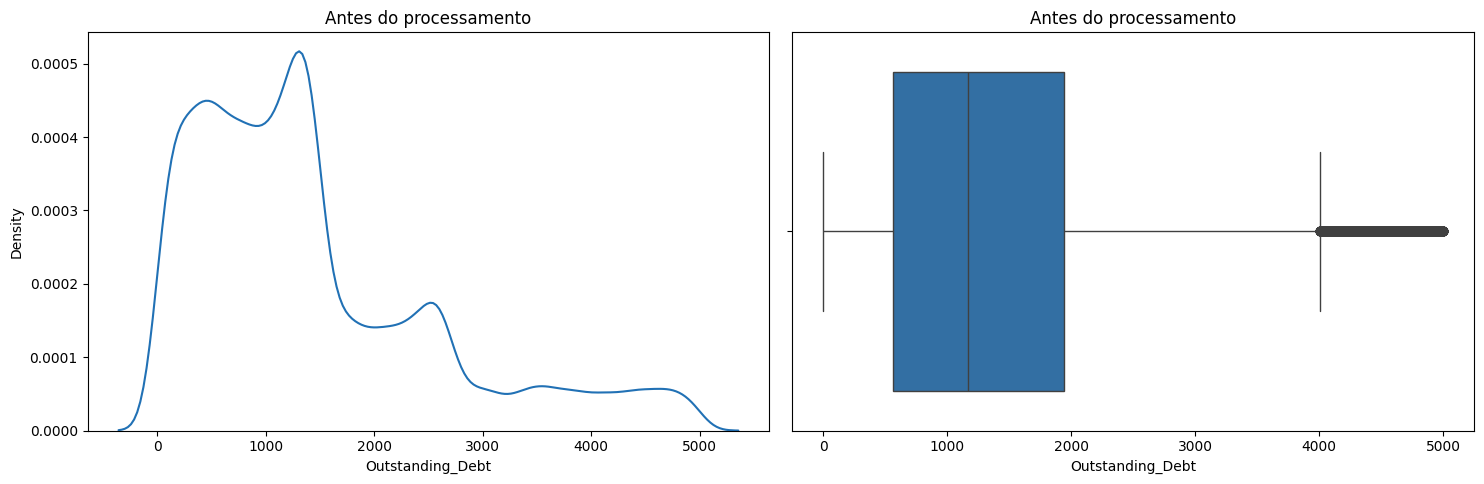

In [ ]:
Distribution(columne = 'Outstanding_Debt', data = df_total, i = 0)

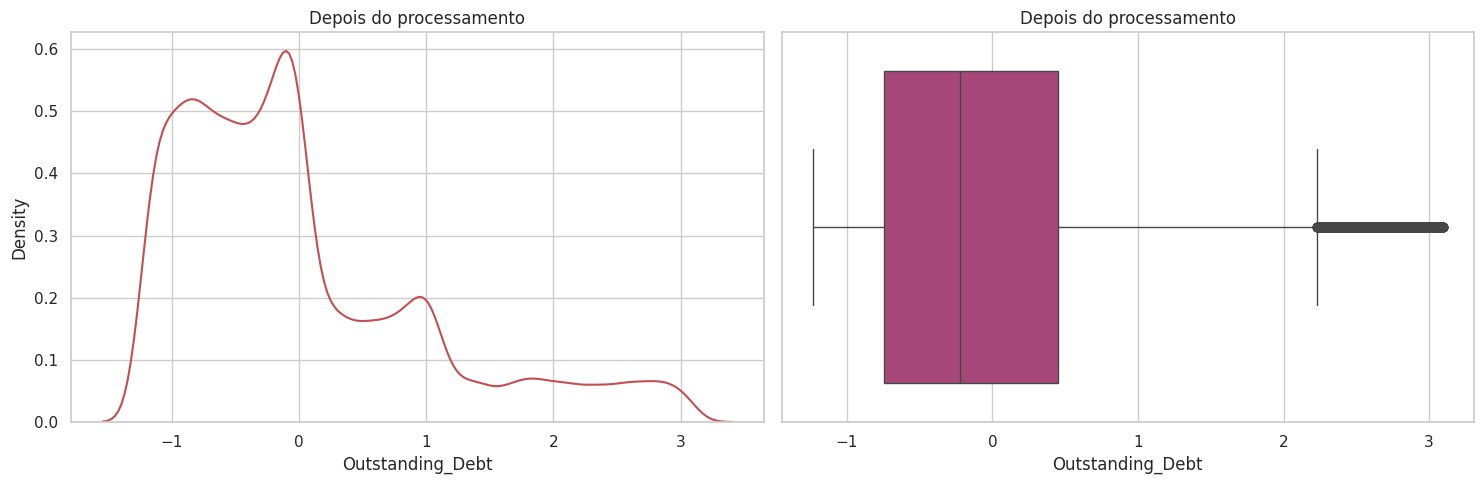

In [ ]:
Distribution(columne = 'Outstanding_Debt', data = df_processado_final, i = 1)

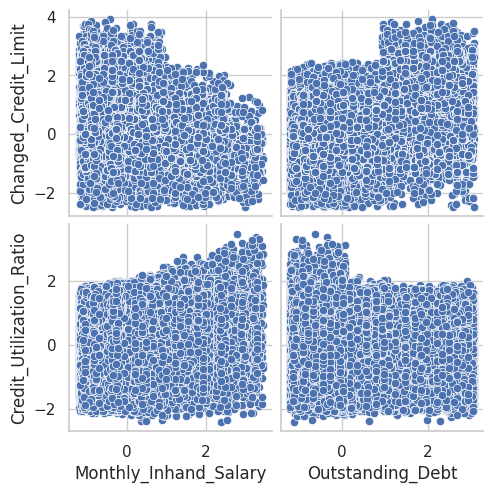

In [ ]:
from turtle import color


sns.pairplot(df_processado_final,
             x_vars=['Monthly_Inhand_Salary','Outstanding_Debt'],
             y_vars=['Changed_Credit_Limit','Credit_Utilization_Ratio'])

## StatsModels.summary() e VIF

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
X_train.dropna(inplace=True)

# If y_train is a pandas Series or DataFrame, align it with X_train after dropping rows:
y_train = y_train[X_train.index]

# Now, try fitting the model again:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)  # You might need to handle inf/NaN in X_test as well

model = sm.OLS(y_train, X_train)
non_reg_OLS = model.fit()
non_reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit_Score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     362.7
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:44:23   Log-Likelihood:                -57892.
No. Observations:               52906   AIC:                         1.158e+05
Df Residuals:                   52888   BIC:                         1.160e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2768      0.004    303.887      0.000       1.269       1.285
Age                         -0.0124      0.003     -3.773      0.000      -0.019      -0.006
Annual_Income               -0.0275      0.010     -2.636      0.008      -0.048      -0.007
Monthly_Inhand_Salary        0.0398      0.011      3.743      0.000       0.019       0.061
Num_Bank_Accounts            0.0611      0.004     13.754      0.000       0.052       0.070
Num_Credit_Card              0.0457      0.004     11.743      0.000       0.038       0.053
Interest_Rate                0.0042      0.005      0.853      0.394      -0.005       0.014
Num_of_Loan                 -0.0028      0.005     -0.622      0.534      -0.012       0.006
Delay_from_due_date         -0.0159      0.004     -3.611      0.000      -0.025      -0.007
Num_of_Delayed_Payment       0.1111      0.004     25.306      0.000       0.102       0.120
Changed_Credit_Limit         0.1331      0.004     36.515      0.000       0.126       0.140
Num_Credit_Inquiries        -0.0573      0.004    -12.911      0.000      -0.066      -0.049
Outstanding_Debt            -0.1463      0.005    -30.130      0.000      -0.156      -0.137
Credit_Utilization_Ratio     0.0024      0.003      0.746      0.455      -0.004       0.009
Total_EMI_per_month         -0.0507      0.004    -12.413      0.000      -0.059      -0.043
Amount_invested_monthly     -0.0026      0.003     -0.827      0.408      -0.009       0.004
Credit_Mix                   0.0647      0.004     17.816      0.000       0.058       0.072
Payment_of_Min_Amount        0.1101      0.005     21.306      0.000       0.100       0.120
==============================================================================
Omnibus:                    10227.166   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3904.575
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                       2.071   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#VIF
def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = data.columns

    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),3)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X_train)

,Var,VIF
3,Monthly_Inhand_Salary,11.44
2,Annual_Income,11.07
6,Interest_Rate,2.40
12,Outstanding_Debt,2.37
7,Num_of_Loan,2.05
4,Num_Bank_Accounts,1.99
8,Delay_from_due_date,1.97
11,Num_Credit_Inquiries,1.96
9,Num_of_Delayed_Payment,1.94
0,const,1.79


## ExtraTreeClassifier - método model.feature_importances

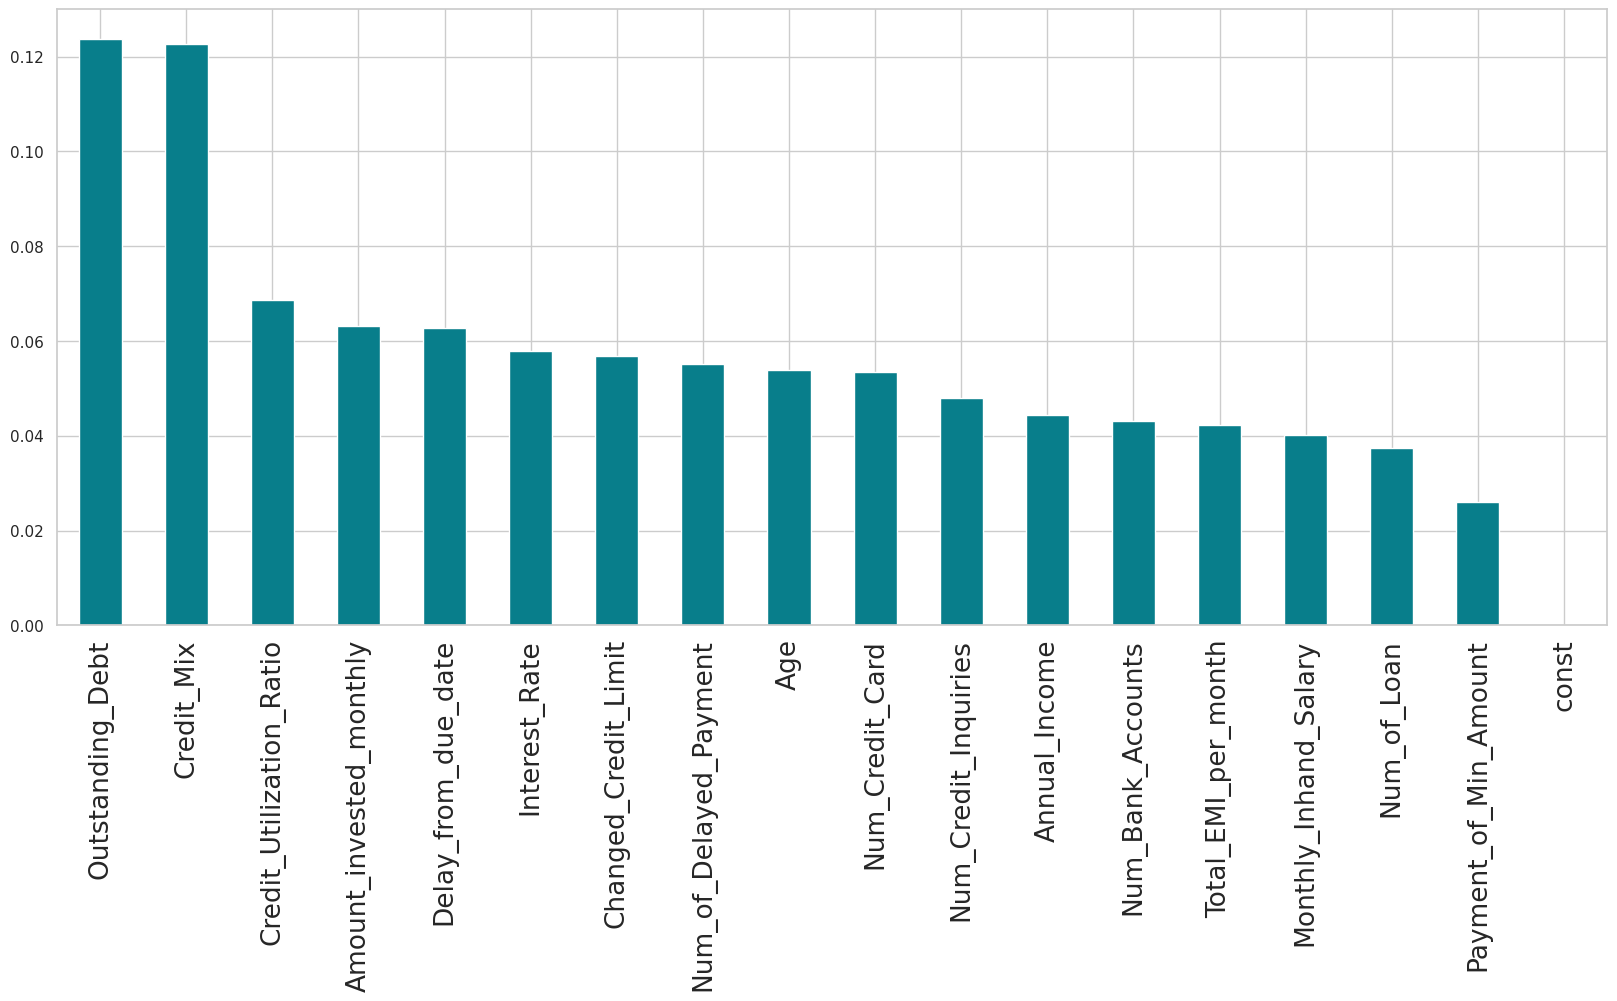

In [ ]:
#ExtraTreeClassifier para feature_importances_

from sklearn.tree import ExtraTreeClassifier

xtc = ExtraTreeClassifier()
xtc.fit(X_train, y_train)
feat_importance = pd.Series(xtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(20,8))
feat_importance.plot(kind='bar', color='#087E8B')
plt.xticks(fontsize=19);

## PCA

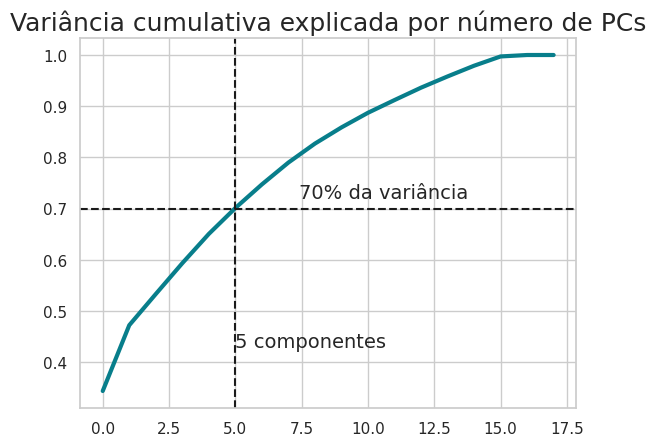

In [ ]:
# Visualização da Análise de Componentes Principais (PCA)
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.axhline(0.7, ls='--', color='k')
plt.axvline(5, ls='--', color='k')
plt.text(7.4, 0.72, '70% da variância', fontsize=14)
plt.text(5, 0.43, '5 componentes', fontsize=14)
plt.title('Variância cumulativa explicada por número de PCs', size=18)
plt.show()

In [ ]:
print('Número de componentes principais para explicar pelo menos 70% da variância: {}'.format(np.argmax(pca.explained_variance_ratio_.cumsum() > 0.7)))
print(f'9 Componentes principais explicam: {pca.explained_variance_ratio_[:7].sum()*100}% da variância')

Número de componentes principais para explicar pelo menos 70% da variância: 5
9 Componentes principais explicam: 74.75% da variância


<Axes: >

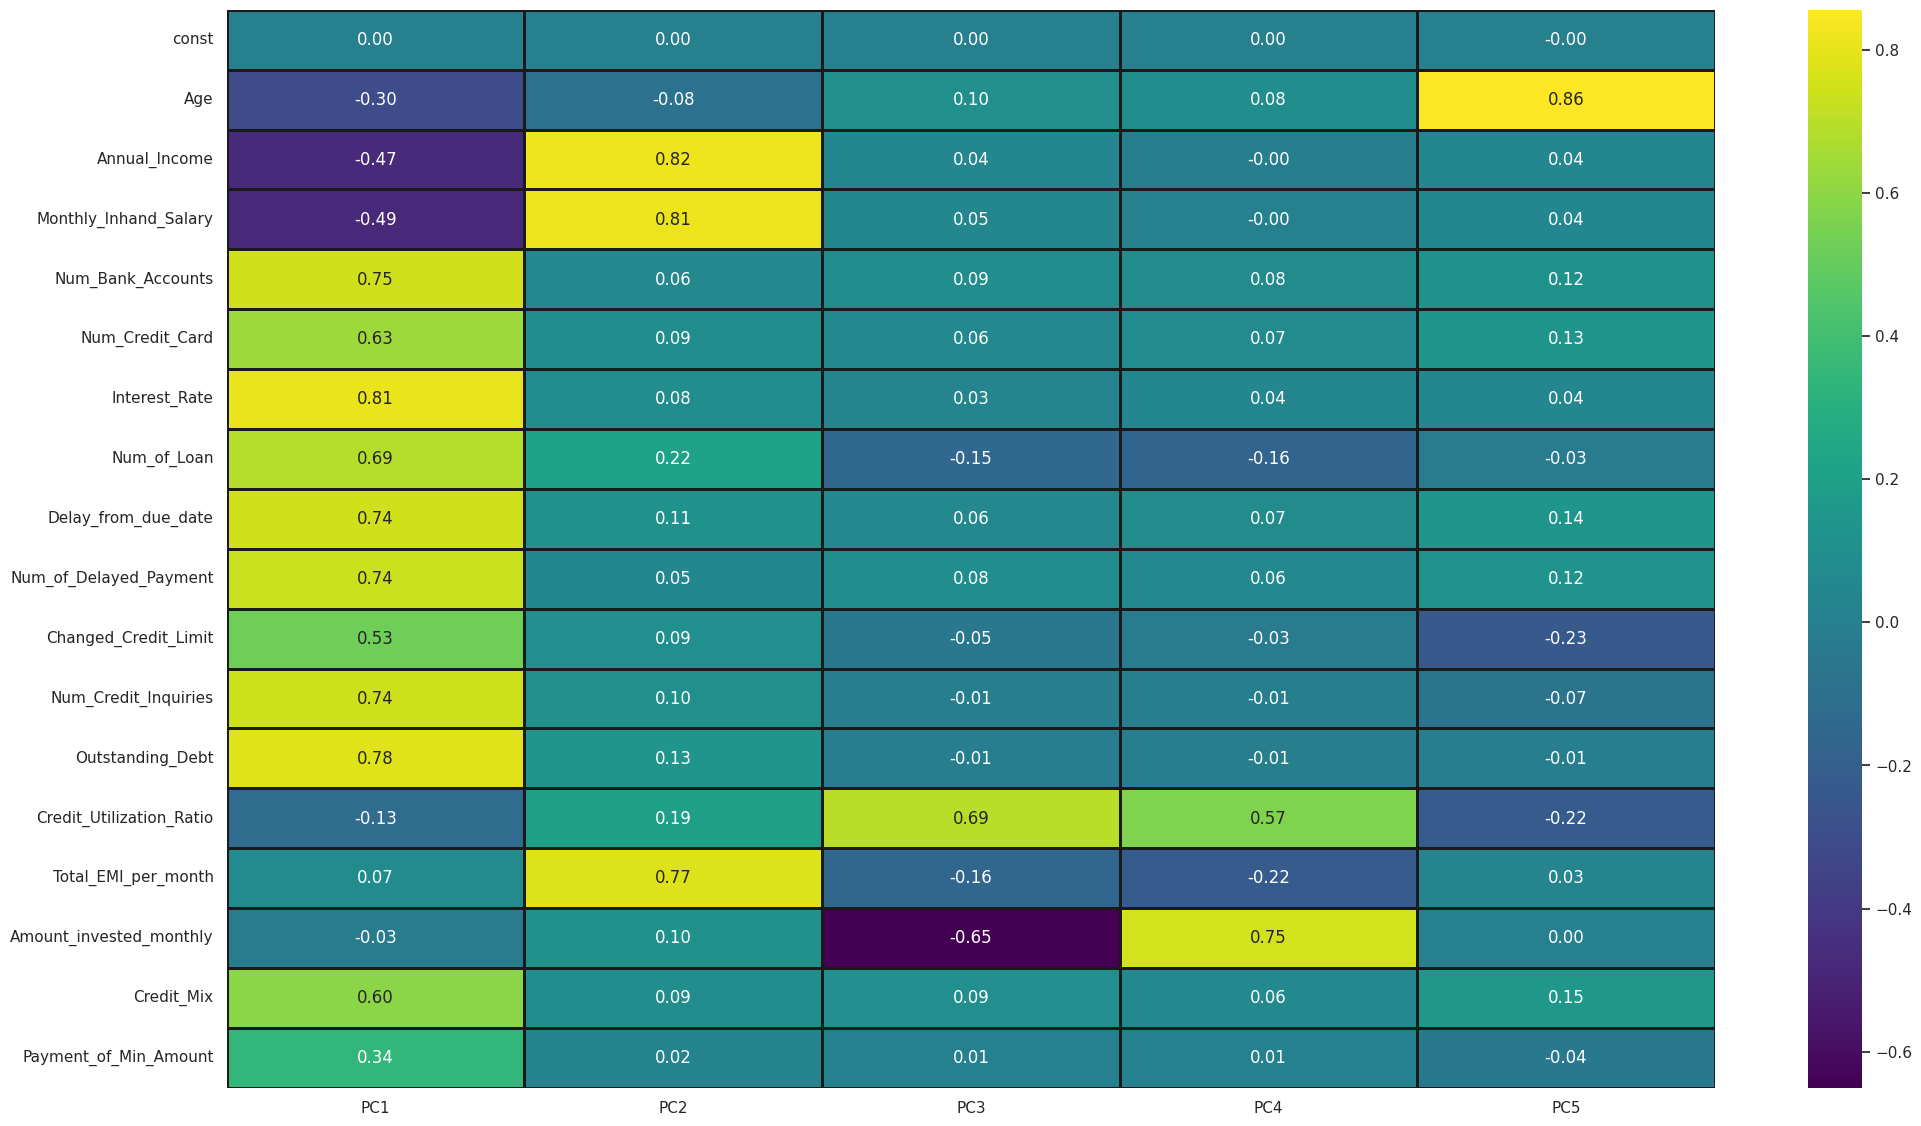

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

plt.figure(figsize=(24,14))
sns.heatmap(loadings.iloc[:,:np.argmax(pca.explained_variance_ratio_.cumsum() > 0.7)], annot=True, cmap='viridis', linewidths=1, linecolor='k', fmt='.2f')

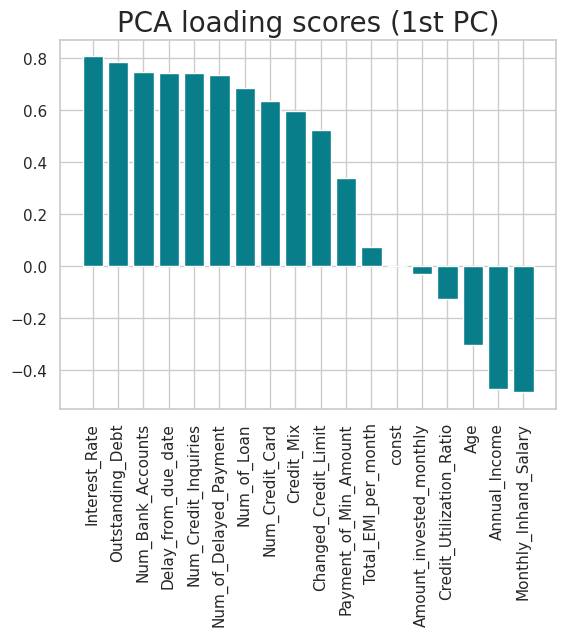

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (1st PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

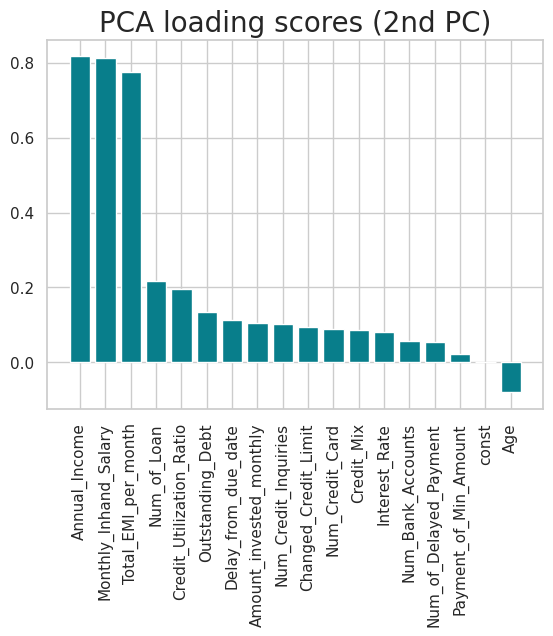

In [ ]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (2nd PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

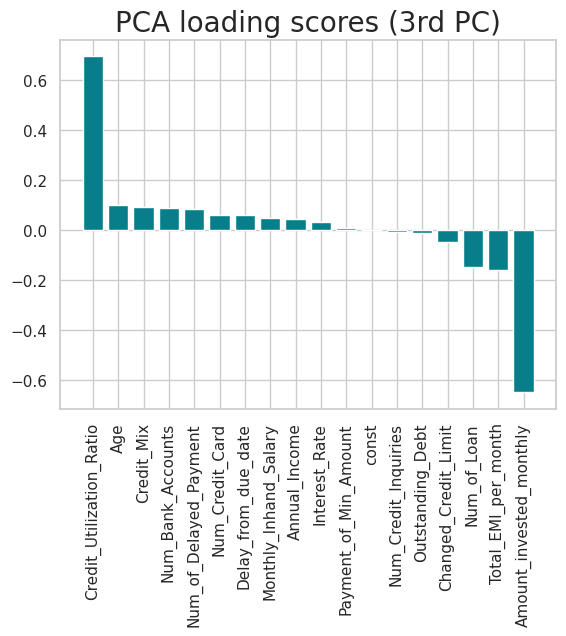

In [ ]:
pc3_loadings = loadings.sort_values(by='PC3', ascending=False)[['PC3']]
pc3_loadings = pc3_loadings.reset_index()
pc3_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc3_loadings['Attribute'], height=pc3_loadings['CorrelationWithPC3'], color='#087E8B')
plt.title('PCA loading scores (3rd PC)', size=20)
plt.xticks(rotation='vertical')
plt.show()

Annual_Income              0.62
Outstanding_Debt           0.61
Total_EMI_per_month        0.56
Monthly_Inhand_Salary      0.52
Interest_Rate              0.17
Credit_Mix                 0.16
Delay_from_due_date        0.12
Changed_Credit_Limit       0.11
Num_Credit_Card            0.11
Payment_of_Min_Amount      0.11
Num_Credit_Inquiries       0.11
Num_Bank_Accounts          0.10
Num_of_Delayed_Payment     0.09
Num_of_Loan                0.09
Age                        0.02
Amount_invested_monthly    0.01
Credit_Utilization_Ratio   0.00
Name: MI Scores, dtype: float64


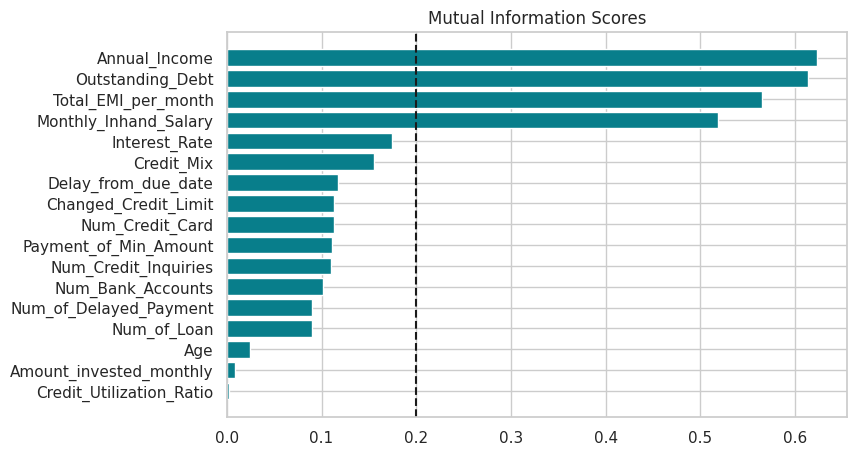

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

def make_mi_scores(X, y, discrete_features):
    # Imputation using SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    mi_scores = mutual_info_regression(X_imputed, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='#087E8B')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.axvline(0.2, color='k', linestyle='--')

# Modelagem

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#from skopt import BayesSearchCV

In [ ]:
# # Criando comparação de acurácia entre os 7 modelos escolhidos

# comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

# modelos = [LogisticRegression(solver='liblinear', random_state=42),
#            KNeighborsClassifier(n_neighbors=41, p=4),
#            DecisionTreeClassifier(random_state=42),
#            RandomForestClassifier(random_state=42),
#            XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#            ExtraTreeClassifier(random_state=42),
#            MLPClassifier(solver='sgd', random_state=42, max_iter=500),
#            ]

# for model in modelos:
#     model_name = model.__class__.__name__
#     scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
#     comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean()]

# print('* Comparação Cross-Validation-Score entre vários modelos: ')
# comparacao_modelos

## Modelo Baseline: Dummy Classifier

In [ ]:
dummymodel = DummyClassifier(strategy='prior')
dummymodel.fit(X_train, y_train)

y_pred_dummy = dummymodel.predict(X_test)

Acurácia:  0.5316524250812372


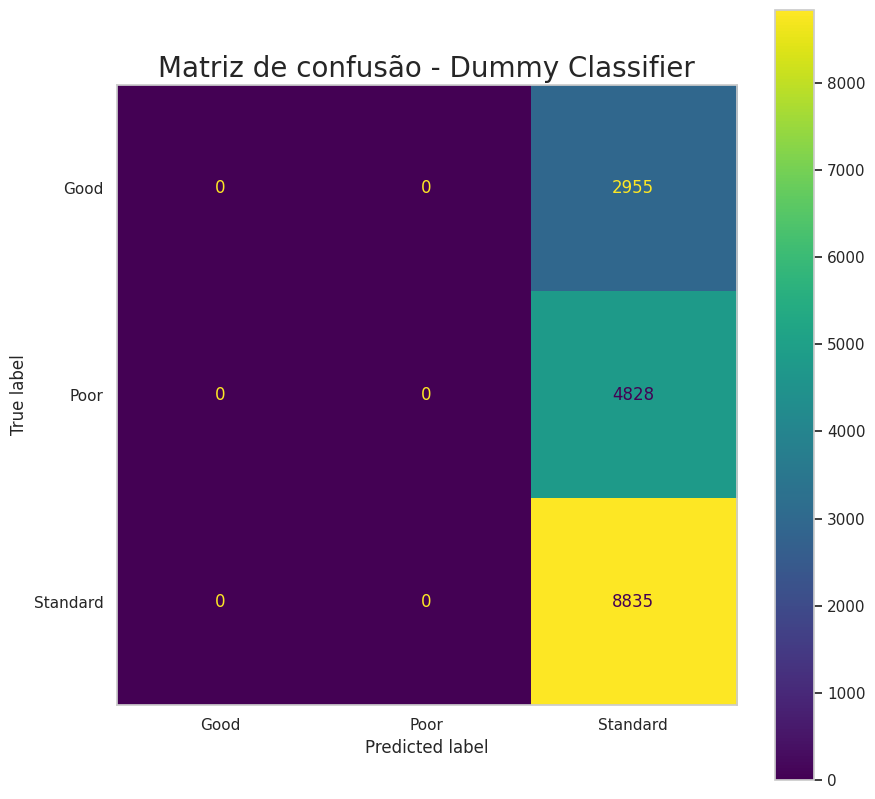

In [ ]:
print('Acurácia: ', accuracy_score(y_test, y_pred_dummy))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dummy), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - Dummy Classifier', fontsize = 20)
plt.show()

In [ ]:
r_auc_dummy = roc_auc_score(y_test, dummymodel.predict_proba(X_test), multi_class = 'ovo')
print('Dummy Classifier tem AUROC = %.3f' % (r_auc_dummy))

Dummy Classifier tem AUROC = 0.500


## 1° Modelo: Extra Trees Classifier

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier

# Create an imputer (e.g., using the mean strategy)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the trained imputer to transform X_test

# Now you can fit and predict with your ExtraTreesClassifier
xtclf = ExtraTreesClassifier(n_jobs=-1,
                             bootstrap=True,
                             criterion='gini',
                             n_estimators=100).fit(X_train, y_train)

y_pred_xt = xtclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2955
           1       0.77      0.78      0.78      4828
           2       0.80      0.80      0.80      8835

    accuracy                           0.78     16618
   macro avg       0.77      0.77      0.77     16618
weighted avg       0.78      0.78      0.78     16618



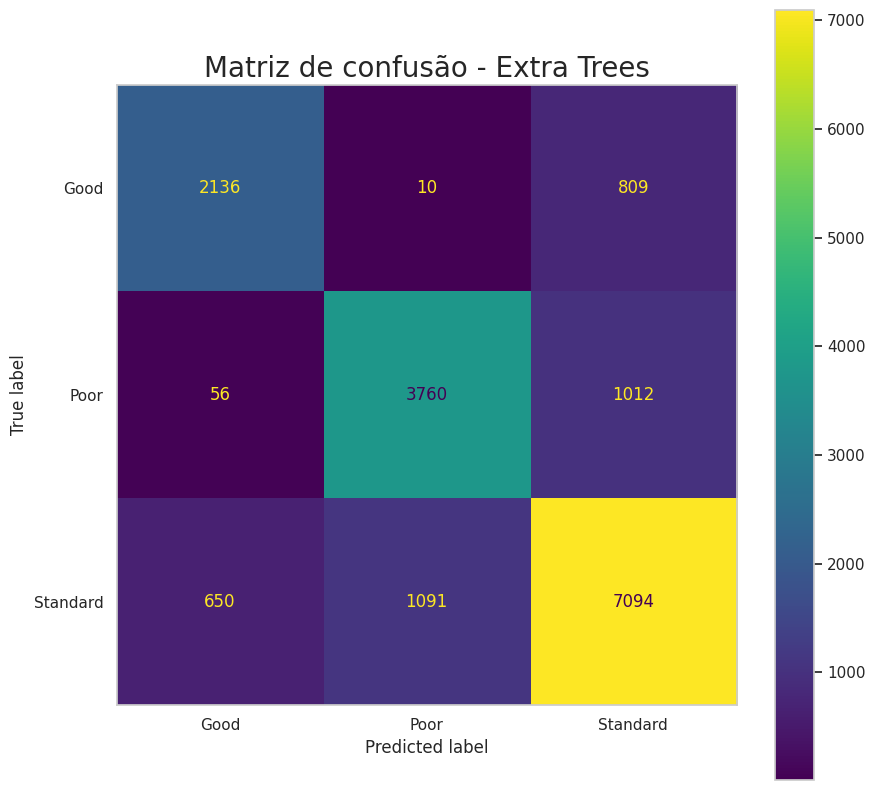

In [ ]:
print(classification_report(y_test, y_pred_xt))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xt), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - Extra Trees', fontsize = 20)
plt.show()

In [ ]:
r_auc_xt = roc_auc_score(y_test, xtclf.predict_proba(X_test), multi_class = 'ovo')
print('Extra Trees tem AUROC = %.3f' % (r_auc_xt))

Extra Trees tem AUROC = 0.915


## 2° Modelo: Random Forest

In [ ]:
rfclf = RandomForestClassifier(random_state = 42,
                               n_jobs = -1,
                               criterion = 'gini',
                               max_depth = None,
                               n_estimators = 100).fit(X_train, y_train)

y_pred_rf = rfclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2955
           1       0.78      0.80      0.79      4828
           2       0.81      0.80      0.80      8835

    accuracy                           0.79     16618
   macro avg       0.78      0.78      0.78     16618
weighted avg       0.79      0.79      0.79     16618



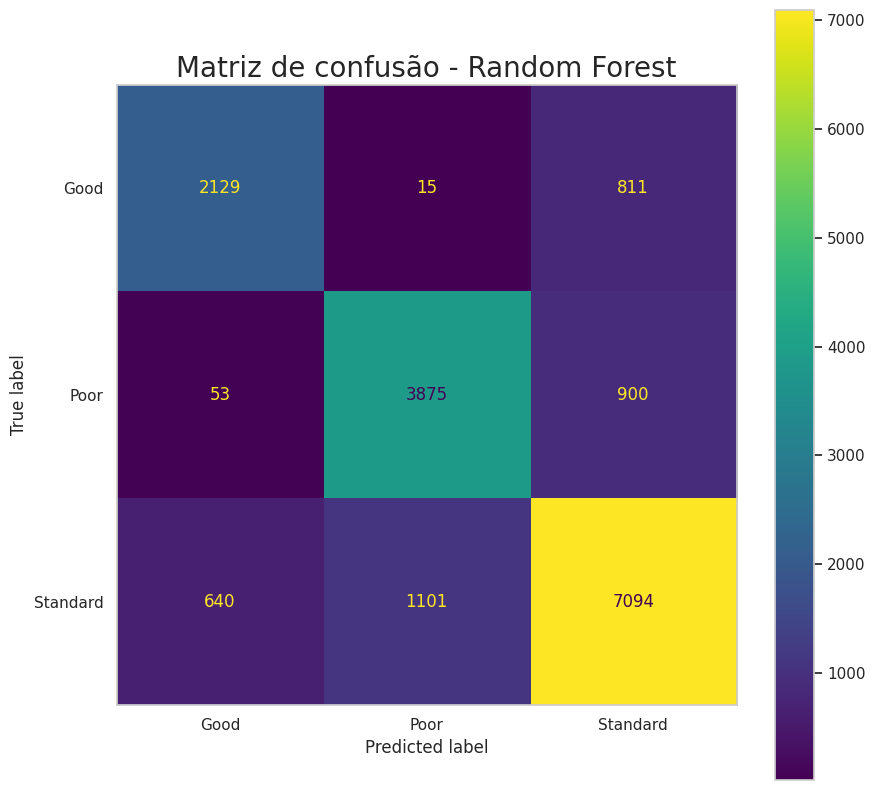

In [ ]:
print(classification_report(y_test, y_pred_rf))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - Random Forest', fontsize = 20)
plt.show()

In [ ]:
r_auc_rf = roc_auc_score(y_test, rfclf.predict_proba(X_test), multi_class = 'ovo')
print('Random Forest tem AUROC = %.3f' % (r_auc_rf))

Random Forest tem AUROC = 0.917


## 3° Modelo: XGBoost

In [ ]:
xgbclassifier = XGBClassifier(eval_metric = 'logloss',
                              use_label_encoder = False,
                              random_state = 42,
                              colsample_bytree = 0.6,
                              gamma = 1.0,
                              learning_rate = 0.1,
                              max_depth = None,
                              min_child_weight = 0.7,
                              n_estimators = 100,
                              subsample = 1.0).fit(X_train, y_train)

y_pred_xgbc = xgbclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      2955
           1       0.74      0.66      0.70      4828
           2       0.75      0.76      0.76      8835

    accuracy                           0.72     16618
   macro avg       0.70      0.70      0.70     16618
weighted avg       0.72      0.72      0.72     16618



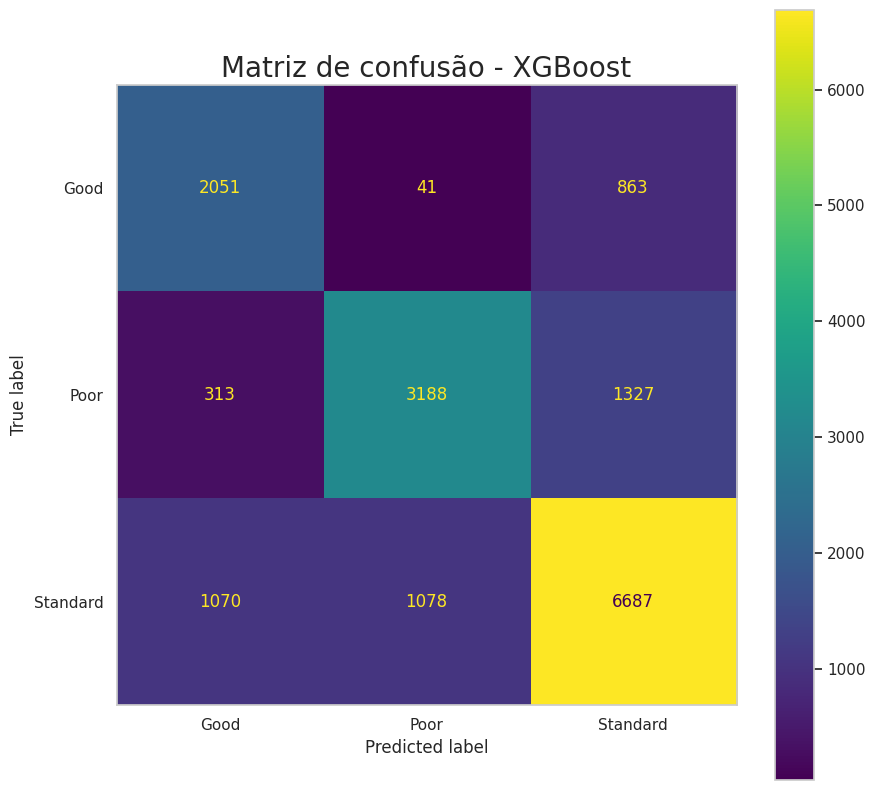

In [ ]:
print(classification_report(y_test, y_pred_xgbc))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgbc), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - XGBoost', fontsize = 20)
plt.show()

In [ ]:
r_auc_xgbc = roc_auc_score(y_test, xgbclassifier.predict_proba(X_test), multi_class = 'ovo')
print('XGBoost tem AUROC = %.3f' % (r_auc_xgbc))

XGBoost tem AUROC = 0.874


## 4° Modelo: Multi-Layer Perceptron (Rede Neural SKLearn)

In [ ]:
mlpc = MLPClassifier(activation='tanh',
                     alpha=0.1,
                     hidden_layer_sizes=100,
                     learning_rate='invscaling',
                     solver='adam',
                     random_state = 42,
                     max_iter = 100,
                     warm_start=True).fit(X_train, y_train)

y_pred_mlpc = mlpc.predict(X_test)

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      2955
           1       0.69      0.66      0.68      4828
           2       0.73      0.72      0.73      8835

    accuracy                           0.69     16618
   macro avg       0.67      0.67      0.67     16618
weighted avg       0.69      0.69      0.69     16618



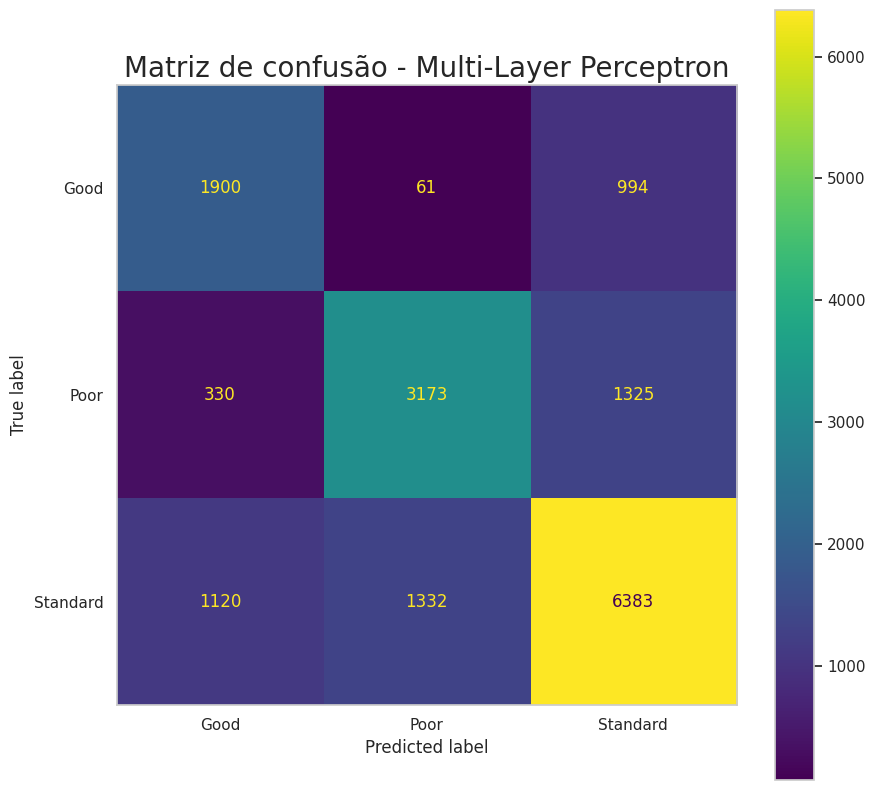

In [ ]:
print(classification_report(y_test, y_pred_mlpc))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlpc), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - Multi-Layer Perceptron', fontsize = 20)
plt.show()

In [ ]:
r_auc_mlp = roc_auc_score(y_test, mlpc.predict_proba(X_test), multi_class = 'ovo')
print('MLP Classifier tem AUROC = %.3f' % (r_auc_mlp))

MLP Classifier tem AUROC = 0.851


## 5° Modelo: Stacking de XGBoost com SVC

In [ ]:
estimators = [('xgbc', XGBClassifier(eval_metric = 'logloss',
                                     use_label_encoder = False,
                                     random_state = 42,
                                     colsample_bytree = 0.6,
                                     gamma = 1.0,
                                     learning_rate = 0.1,
                                     max_depth = None,
                                     min_child_weight = 0.7,
                                     n_estimators = 100,
                                     subsample = 1.0)),
              ('svc', SVC(random_state=42,
                          C = 0.1,
                          degree = 3,
                          gamma ='scale',
                          kernel = 'poly',
                          probability = False,
                          shrinking = True,
                          tol = 1e-05))
              ]

stackingclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42, max_iter=100), cv=3).fit(X_train, y_train)

y_pred_stacking = stackingclf.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      2955
           1       0.74      0.66      0.70      4828
           2       0.74      0.78      0.76      8835

    accuracy                           0.72     16618
   macro avg       0.71      0.69      0.70     16618
weighted avg       0.72      0.72      0.72     16618



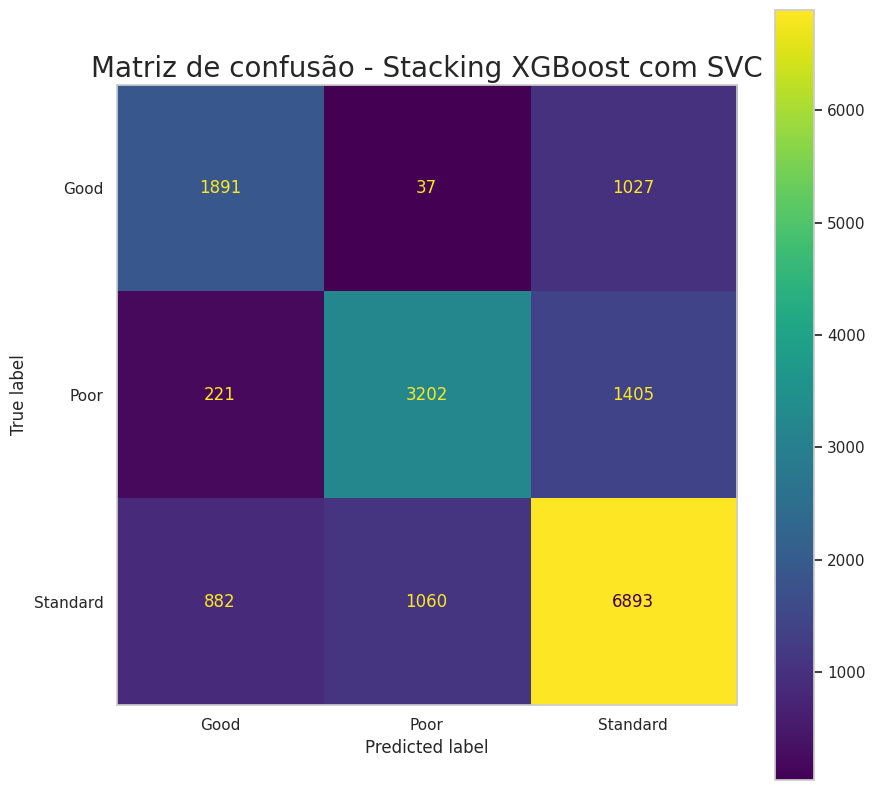

In [ ]:
print(classification_report(y_test, y_pred_stacking))
cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Good', 'Poor', 'Standard'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmp1.plot(ax=ax)
plt.rc('font')
plt.title('Matriz de confusão - Stacking XGBoost com SVC', fontsize = 20)
plt.show()

In [ ]:
r_auc_stacking = roc_auc_score(y_test, stackingclf.predict_proba(X_test), multi_class = 'ovo')
print('Stacking Classifier tem AUROC = %.3f' % (r_auc_stacking))

Stacking Classifier tem AUROC = 0.874


## Comparativos dos modelos

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, modelname, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC curve - for {modelname}', fontdict={'fontsize': 26})
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

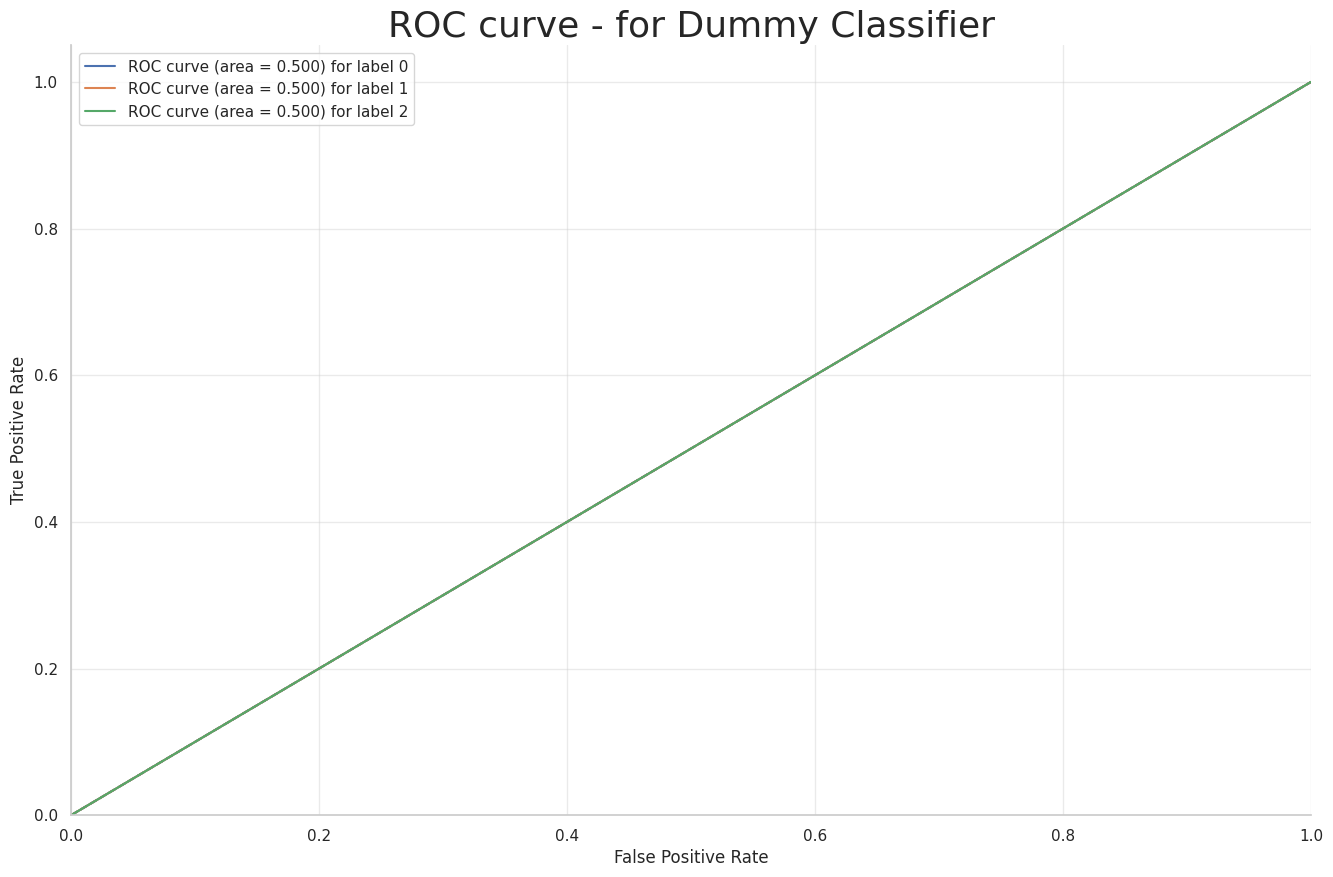

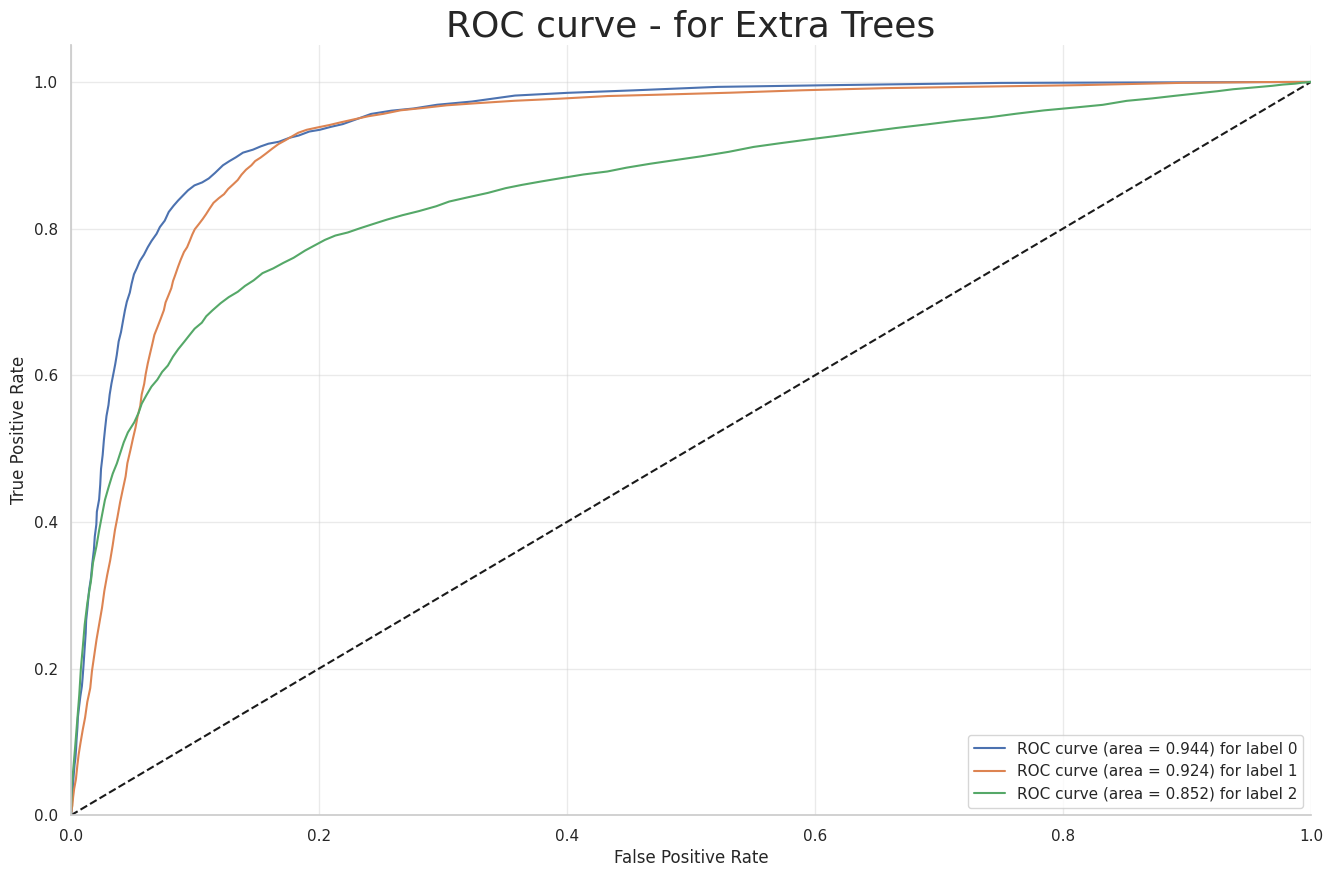

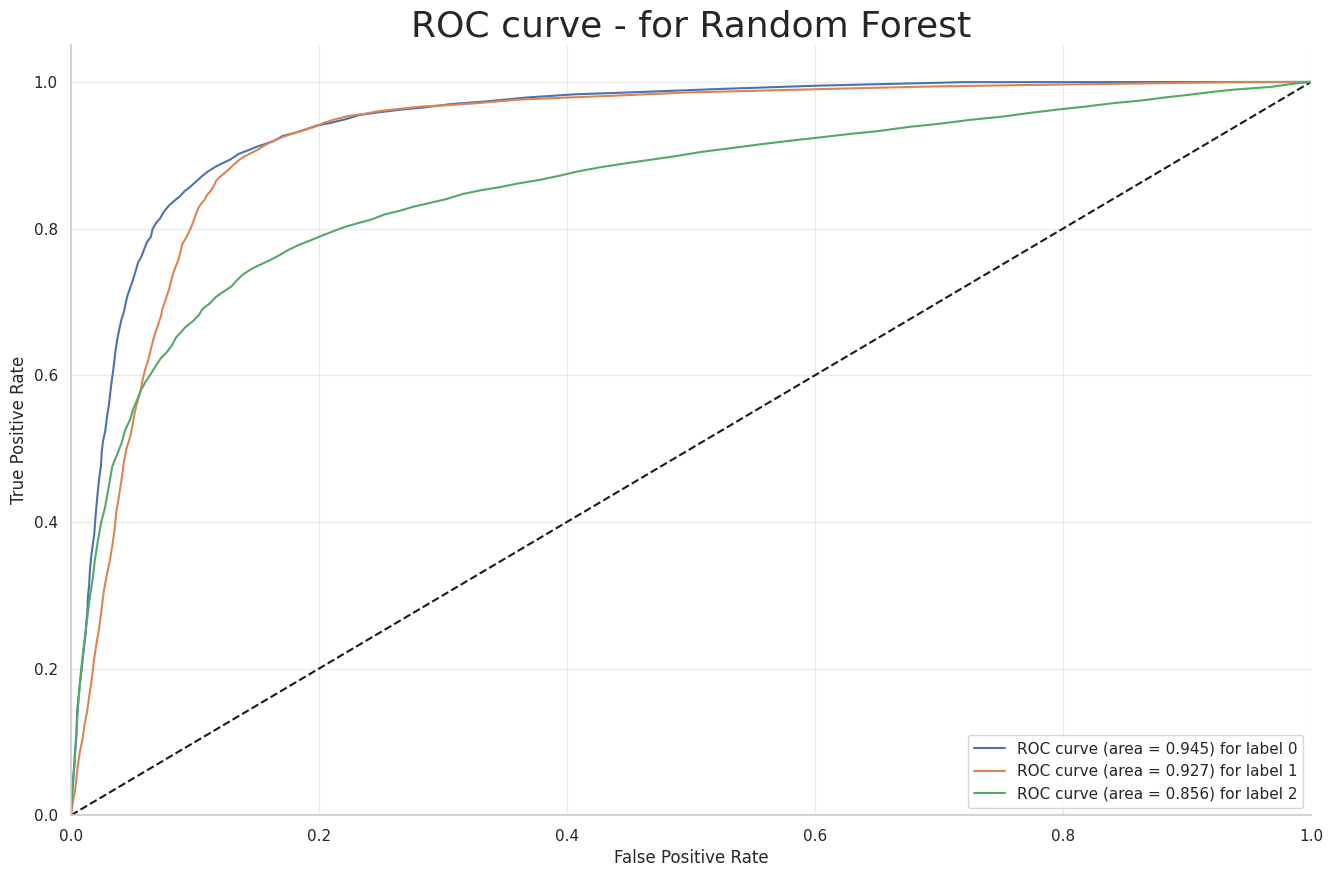

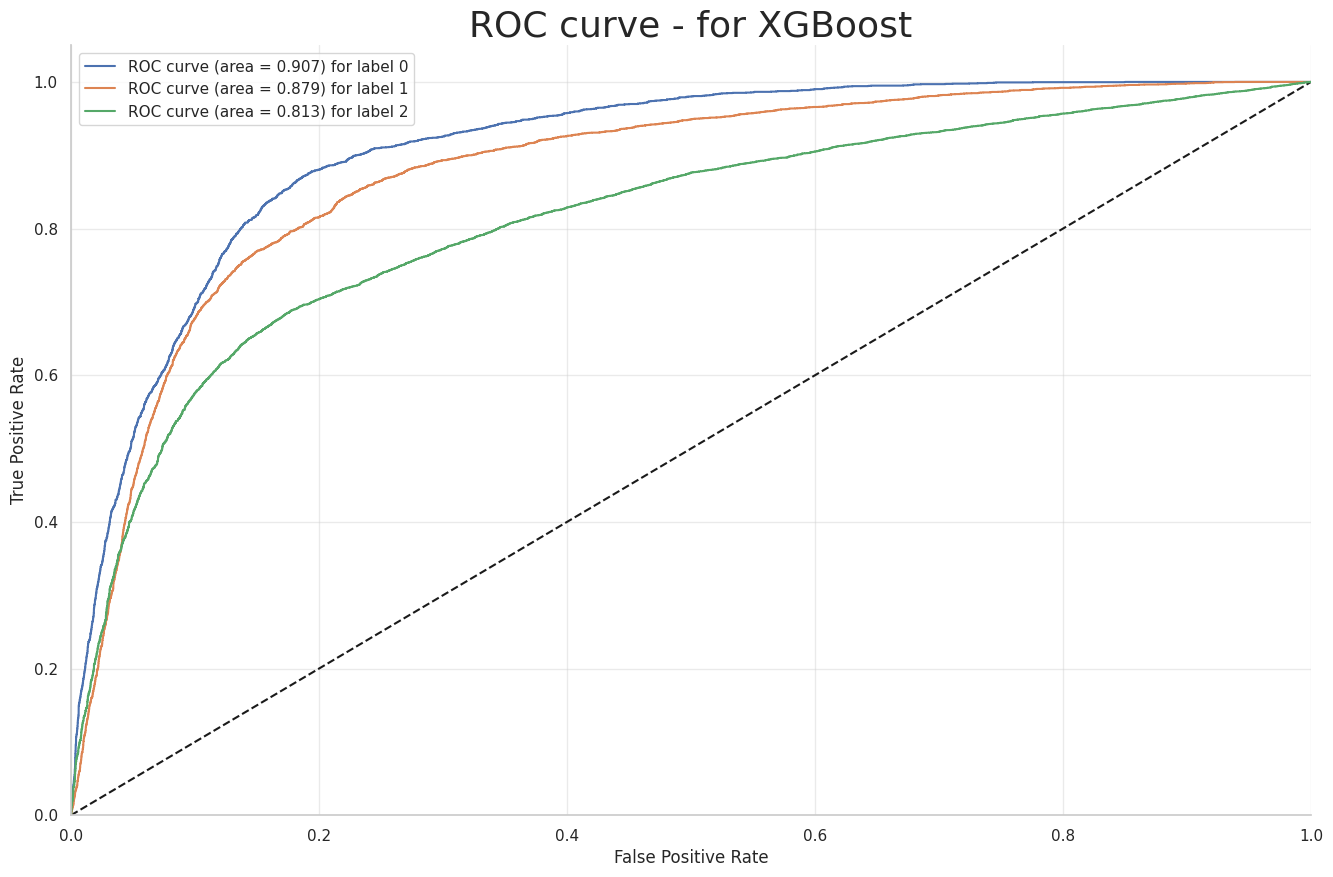

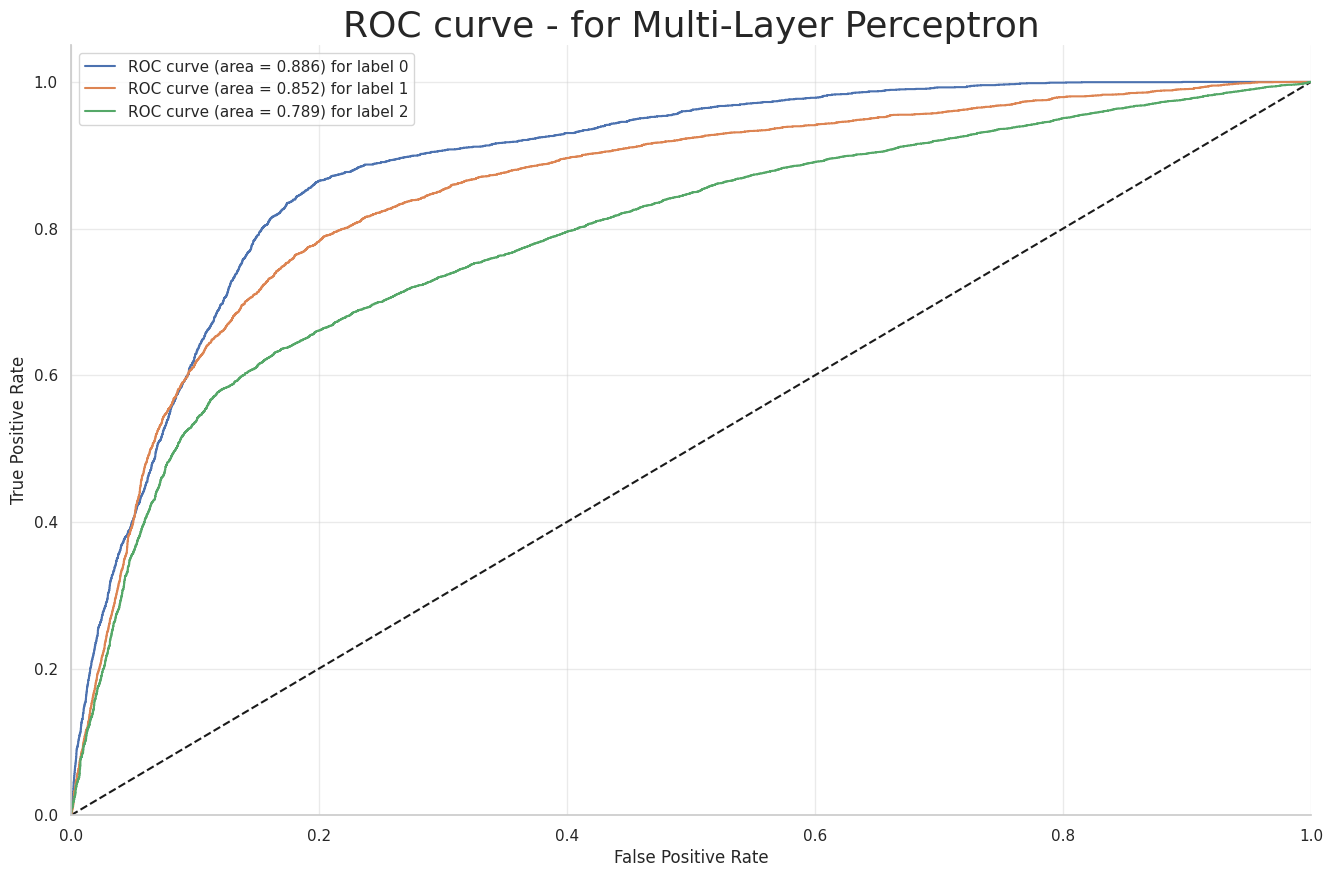

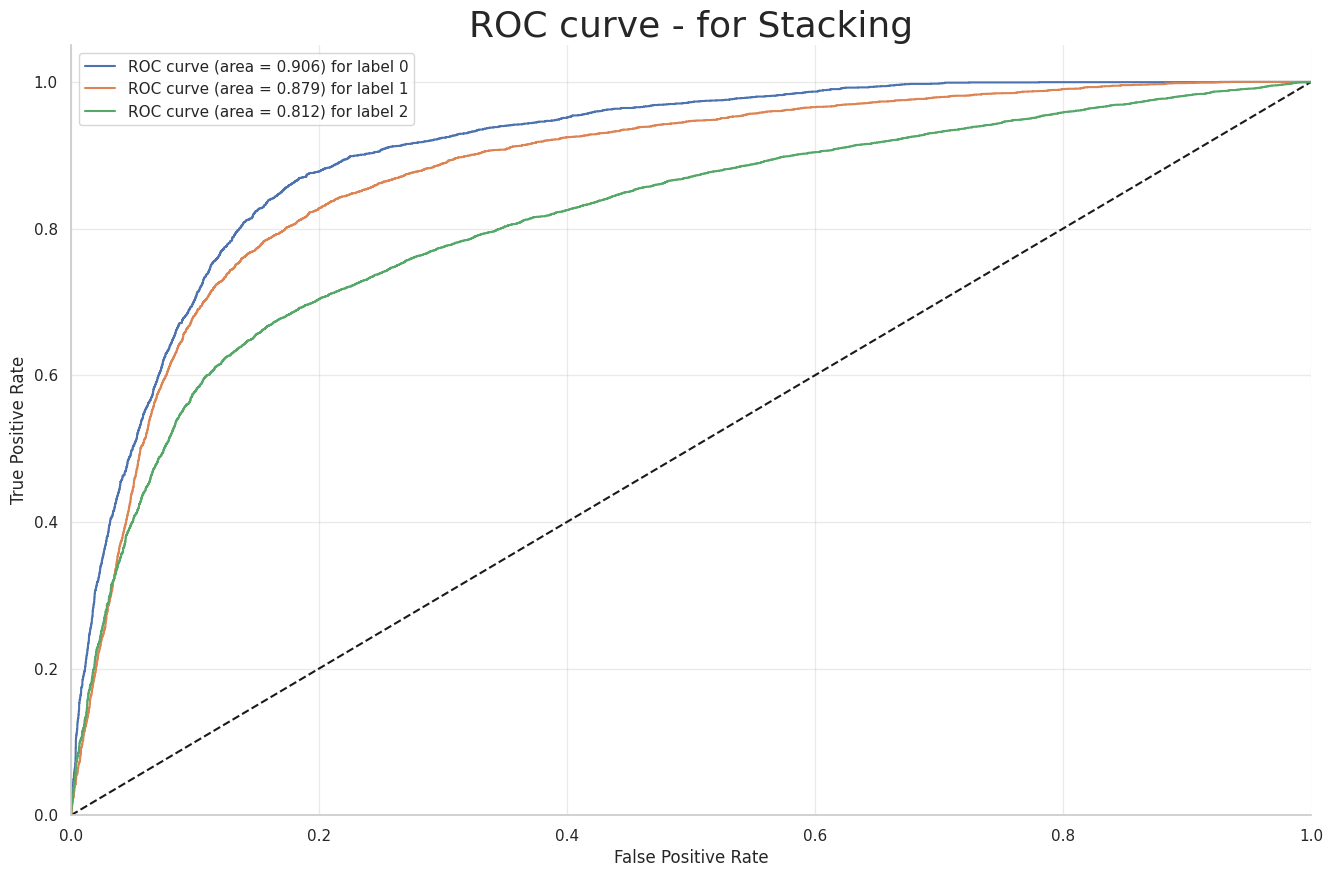

In [ ]:

plot_multiclass_roc(dummymodel, X_test, y_test, n_classes = 3, modelname = 'Dummy Classifier', figsize = (16,10))
plot_multiclass_roc(xtclf, X_test, y_test, 3, 'Extra Trees', (16, 10))
plot_multiclass_roc(rfclf, X_test, y_test, 3, 'Random Forest', (16, 10))
plot_multiclass_roc(xgbclassifier, X_test, y_test, 3, 'XGBoost', (16, 10))
plot_multiclass_roc(mlpc, X_test, y_test, 3, 'Multi-Layer Perceptron', (16, 10))
plot_multiclass_roc(stackingclf, X_test, y_test, 3, 'Stacking', (16, 10))

## Curvas ROC conjuntas (para a classe Standard)

In [ ]:
def plot_allmodels_roc(clf, X_test, y_test, figsize=(17, 6)):
    y_score = []

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

    for i, it in zip(clf, range(len(clf))):
        y_score = i.predict_proba(X_test)[:, 2]
        fpr[it], tpr[it], _ = roc_curve(y_test_dummies[:, 2], y_score)
        roc_auc[it] = auc(fpr[it], tpr[it])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', label='DummyClassifier (AUC = 0.500)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC curve for Standard Class (OvR) - All models', fontdict={'fontsize': 26})

    for i, it in zip(clf, range(len(clf))):
        ax.plot(fpr[it], tpr[it], label='%s (AUC = %0.3f)' % (i.__class__.__name__, roc_auc[it]))

    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

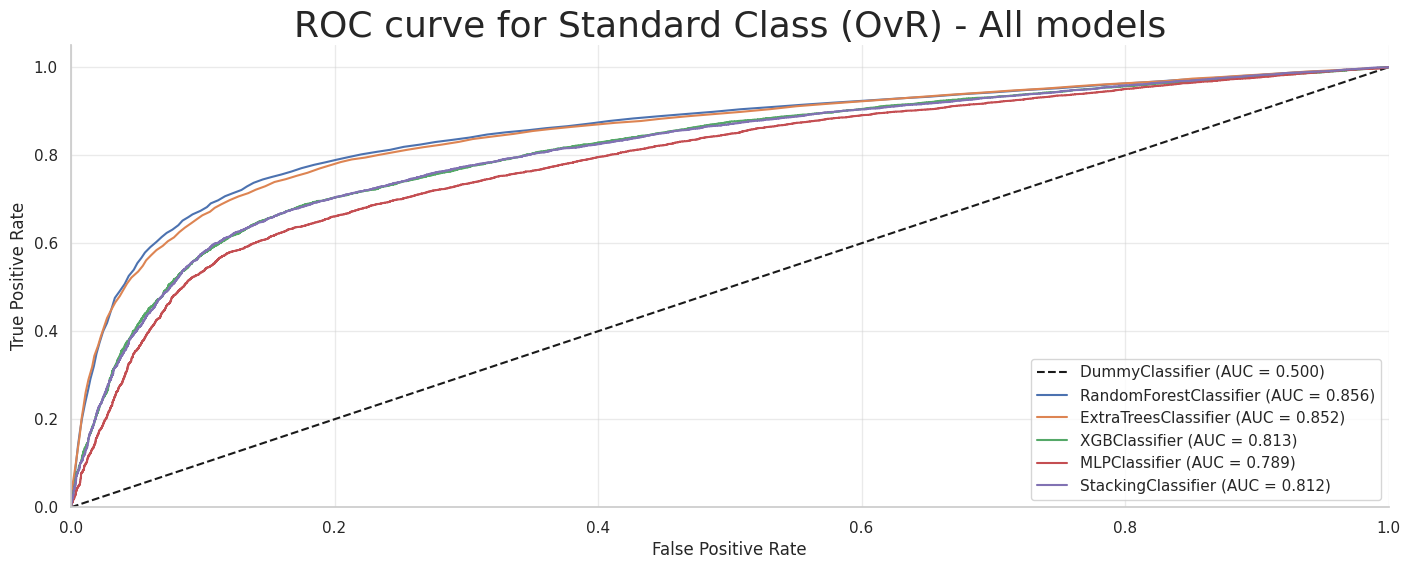

In [ ]:
plot_allmodels_roc([rfclf, xtclf, xgbclassifier, mlpc, stackingclf], X_test, y_test)

## Tabela comparativa de Métricas

In [ ]:
def perf_measure(y_actual, y_hat):

   metricas = []
   TP, FP, TN, FN = 0, 0, 0, 0

   TP = confusion_matrix(y_actual, y_hat)[2][2]
   FP = confusion_matrix(y_actual, y_hat)[0][2] + confusion_matrix(y_actual, y_hat)[1][2]
   TN = confusion_matrix(y_actual, y_hat)[0][0] + confusion_matrix(y_actual, y_hat)[0][1] + confusion_matrix(y_actual, y_hat)[1][0] + confusion_matrix(y_actual, y_hat)[1][1]
   FN = confusion_matrix(y_actual, y_hat)[2][0] + confusion_matrix(y_actual, y_hat)[2][1]

   metricas.append(TP)
   metricas.append(FP)
   metricas.append(TN)
   metricas.append(FN)

   return metricas

In [ ]:
comparativo_final_metricas = pd.DataFrame(columns = ['Acurácia', 'Recall', 'FN', 'F1-Score', 'AUROC'])

comparativo_final_metricas.loc['Dummy'] = [accuracy_score(y_test, y_pred_dummy),
                                           recall_score(y_test, y_pred_dummy, average='macro'),
                                           perf_measure(y_test, y_pred_dummy)[3].sum(),
                                           f1_score(y_test, y_pred_dummy, average='macro'),
                                           r_auc_dummy
                                           ]

comparativo_final_metricas.loc['Extra Trees'] = [accuracy_score(y_test, y_pred_xt),
                                                 recall_score(y_test, y_pred_xt, average='macro'),
                                                 perf_measure(y_test, y_pred_xt)[3].sum(),
                                                 f1_score(y_test, y_pred_xt, average='macro'),
                                                 r_auc_xt
                                                 ]

comparativo_final_metricas.loc['Random Forest'] = [accuracy_score(y_test, y_pred_rf),
                                                   recall_score(y_test, y_pred_rf, average='macro'),
                                                   perf_measure(y_test, y_pred_rf)[3].sum(),
                                                   f1_score(y_test, y_pred_rf, average='macro'),
                                                   r_auc_rf
                                                   ]

comparativo_final_metricas.loc['XGBoost'] = [accuracy_score(y_test, y_pred_xgbc),
                                             recall_score(y_test, y_pred_xgbc, average='macro'),
                                             perf_measure(y_test, y_pred_xgbc)[3].sum(),
                                             f1_score(y_test, y_pred_xgbc, average='macro'),
                                             r_auc_xgbc
                                             ]

comparativo_final_metricas.loc['Multi Layer Perceptron'] = [accuracy_score(y_test, y_pred_mlpc),
                                                            recall_score(y_test, y_pred_mlpc, average='macro'),
                                                            perf_measure(y_test, y_pred_mlpc)[3].sum(),
                                                            f1_score(y_test, y_pred_mlpc, average='macro'),
                                                            r_auc_rf
                                                            ]

comparativo_final_metricas.loc['Stacking'] = [accuracy_score(y_test, y_pred_stacking),
                                              recall_score(y_test, y_pred_stacking, average='macro'),
                                              perf_measure(y_test, y_pred_stacking)[3].sum(),
                                              f1_score(y_test, y_pred_stacking, average='macro'),
                                              r_auc_stacking
                                              ]

In [ ]:
comparativo_final_metricas = comparativo_final_metricas.sort_values(by='Acurácia', ascending=False)
comparativo_final_metricas

,Acurácia,Recall,FN,F1-Score,AUROC
Random Forest,0.79,0.78,1741.00,0.78,0.92
Extra Trees,0.78,0.77,1741.00,0.77,0.91
Stacking,0.72,0.69,1942.00,0.70,0.87
XGBoost,0.72,0.70,2148.00,0.70,0.87
Multi Layer Perceptron,0.69,0.67,2452.00,0.67,0.92
Dummy,0.53,0.33,0.00,0.23,0.50


### Conclusão

1. Random Forest é o modelo de melhor desempenho geral, seguido de perto pelo
Extra Trees. Ambos apresentam boa acurácia, recall, F1-Score e um AUROC elevado, sendo as melhores opções;
2. Stacking e XGBoost oferecem um desempenho intermediário, com AUROC aceitável, mas com acurácia e recall menores quando comparados com os modelos anteriores;
3. MLP não performa bem em termos de recall e acurácia, apesar de seu AUROC ser alto.
4. Dummy apresenta a menor performance, como esperado por ser um modelo de comparação.

A escolha ideal, portanto, seria o Random Forest, seguido de Extra Trees, dependendo de qual métrica específica for mais importante para o caso em questão.